# JavaScript and the Document Object Model
### Contents
#### DOM
* [The \<script\> Element](#The-<script>-Element)
* [Window, Document and Body](#Window,-Document-and-Body)
* [Navigating the DOM Tree](#Navigating-the-DOM-Tree)
* [Getting Elements by Tag Name](#Getting-Elements-by-Tag-Name)
* [Getting Elements by Class Name](#Getting-Elements-by-Class-Name)
* [Getting Element by ID](#Getting-Element-by-ID)
* [Getting elements with CSS NodeSelectors](#Getting-elements-with-CSS-NodeSelectors)
* [Parents, Children & Siblings](#Parents,-Children-&-Siblings)
* [Getting Specific Element Properties](#Getting-Specific-Element-Properties)
* [Writing the Document](#Writing-the-Document)
* [Changing Existing Elements](#Changing-Existing-Elements)
* [Adding and Removing Elements](#Adding-and-Removing-Elements)
* [innerHTML](#innerHTML)

#### Events
* [Click Events](#Click-Events)
* [Mouse Movements & Scrolling](#Mouse-Movements-&-Scrolling)
* [Loading Events](#Loading-Events)
* [Change Events](#Change-Events)
* [Keyboard Events](#Keyboard-Events)
* [Adding Event Listeners](#Adding-Event-Listeners)
* [Working With JavaScript Functions](#Working-With-JavaScript-Functions)

#### Working with Forms
* [Getting Form Values](#Getting-Form-Values)
* [Prepopulating Form Fields](#Prepopulating-Form-Fields)
* [Form Submission](#Form-Submission)
* [GET vs POST Requests](#GET-vs-POST-Requests)
* [Validating Form Data](#Validating-Form-Data)

#### Connecting What You Know
* [The DOM is a Data Structure](#The-DOM-is-a-Data-Structure)
* [Iterating DOM Elements](#Iterating-DOM-Elements)
* [Organizing DOM Elements Into Structures](#Organizing-DOM-Elements-Into-Structures)
* [Writing Complex HTML With JavaScript](#Writing-Complex-HTML-With-JavaScript)

## Hello JavaScript!

Thus far everything you've done with JavaScript has centered around JavaScript itself. The real power of JavaScript is in its ablity to manipulate the DOM. As you learned at the beginning of this module, one of the most common things JavaScript is used for is adding interactivity to otherwise static webpages. To do this, you need to integrate the two technologies with one another. In the runnable example below, when you click the run button you will see two key things:

1. The text "Hello from HTML!" will be rendered in the body of the page
2. The string "Hello from JavaScript!" will be logged to the console
This is accomplished by adding the `console.log()` message in the body of the HTML using the `<script>` element. Because JavaScript runs right in the browser, the script is executed when the page loads, and the message is logged to the console. You'll learn more about the `<script>` element in the next unit.
```JavaScript
  <body>
      <h1>Hello from HTML!</h1>
      <script>
        console.log('Hello from JavaScript!');
      </script>
  </body>
```

## The `<script>` Element
![script+element.png](./img/script+element.png)

The `<script>` HTML element is the mechanism you use to embed JavaScript code into an HTML webpage, and it's simple to do: just wrap the same JavaScript code you've been using all along in these script tags and the browser will run the code whenever it encounters them. This allows you to add all sorts of interactivity to your webpages. Anything you can do in JavaScript is possible to embed and run in your HTML including loops, conditional statements, functions and everything else you've learned so far. To demonstrate a little more of what's possible, the following example uses a JavaScript interval function to count how long it's been since you loaded the page. As you study this example, think about what's actually happening in the code. What do you think the `timerElement` variable represents? What about the `1000` in the `setInterval()` function? How is the screen actually being updated by the code, and what are the steps to make it happen?
```HTML
  <body>
    <h1>It's been <span id="timer">0</span> seconds since you loaded the page...</h1>
    <script>
      setInterval(function(){ 
        let timerElement = document.getElementById('timer');
        let currentTime = timerElement.innerHTML;
        currentTime++;
        timerElement.innerHTML = currentTime;
      }, 1000);
    </script>
  </body>
```
<h3>It's been 42 seconds since you loaded the page...</h3>

### Using External Scripts
It's possible to add as many scripts as you want to your HTML, and they can be as long as you wish. As your scripts become more and more advanced though, embedding them directly into the HTML makes both the HTML and the JavaScript difficult to maintain and muddies the waters with respect to which type of file you're looking at. If you open a `.html` file and find that it only has 20 lines of HTML but embeds 500 lines of JavaScript at the bottom of it, is it really even an HTML file anymore?

Luckily there's another option: The `<script>` element, like many HTML elements, can use attributes (like the `id` and `class` attributes on other elements). The two attributes you'll use most commonly with the `<script>` element are the `src` attribute and the `type` attribute. The `src`attribute allows you to load the script (in most cases, your JavaScript code) from an external file, and the `type` attribute tells the browser which type of script it is (usually `"text/javascript"`). You've even done this already with the `<link>` attribute in the CSS module to connect your HTML to an external stylesheet. This is the exact same thing, but you're connecting to a JavaScript file instead. By extracting your JavaScript code out of the HTML and into a separate file, you separate the HTML code from the JavaScript code and keep both files cleaner, easier to read and easier to maintain.

To do this is simple. First create a new file with a `.js` extension and put all your JavaScript code in that file. Next, remove all the code from between the opening and closing script tags in your HTML and add the `src` and `type` attributes:

`index.html`:
```HTML
  <body>
    ...
    <script src="myscript.js" type="text/javascript"></script>
  </body>
```
`myscript.js`:
```JavaScript
console.log('Hello from the external JS file!');
```

### When to Use Internal vs. External Scripts
You've seen over the last several units that there are two ways to embed JavaScript into your HTML documents: internally and externally. In general, you should prefer to include JavaScript in external files using the src attribute on the `<script>` element whenever possible for a few reasons:

1. It keeps JavaScript out of your HTML and HTML out of your JavaScript, allowing both files to be cleaner and easier to maintain.
2. It allows you to use the same JavaScript file in multiple HTML files, giving you a single place to make changes to your JS which affect your entire website.
3. External files can be cached by the browser, allowing them to be loaded faster which improves page load times.

If you have just a few lines of JavaScript that will only be used on a single page, it's OK to skip the external file, but you should also consider that as your website grows, that small bit of JavaScript may turn into more and more JavaScript until eventually it becomes so long and complex that it should be moved into its own file. For this reason, often it's still best to include even small amounts of JS via external files to avoid this type of "tech debt" which can sneak up on you over time.

### Where to Include the `<script>` Element:
You can include the `<script>` element either in the `<head>` or the `<body>` of your HTML page, and the browser will interpret the entire file in order from top to bottom, whether you include it internally or externally. Most of the time, it's preferred to load any JavaScript at the very bottom of your HTML, just before the closing `</body>` tag. This allows all the other content on your page to load first and if there is a problem with the JavaScript it won't prevent the rest of the page from loading. However, because sometimes certain elements in your HTML might depend on a JavaScript file being loaded, you will sometimes need to include these script files in different places in the HTML.

There's no exact rule for where you include a `<script>` element in your HTML, and you can have them scattered throughout the file and everything will work fine, but you must remember that the browser will interpret the HTML file from top to bottom, so JavaScript files must be loaded in the order in which they are required by both each other and the rest of the HTML file. In other words, if you have JavaScript code in `file-a.js` and other code in `file-b.js` which depends on `file-a.js` being run first, you must place the script element that loads `file-a.js` before the one that loads `file-b.js` in your HTML. This is a critical point to keep in mind because you will often use multiple scripts in the same HTML file which all depend on one another and if you load them out of order your scripts won't work!

## Window, Document and Body
![window+document+and+body.png](./img/window+document+and+body.png)
The core of your ability to use JavaScript to interact with the browser and thus HTML documents lies in three high-level objects:

* `window`: The global window object which represents the browser window
* `document`: The document containing the HTML document, which lives inside the window
* `document.body`: The body of the HTML document

With these three objects you can access any element in the entire browser window with JavaScript, from the address bar at the top to the status bar at the bottom of the page, every HTML element in the document and plenty of other useful things.

The three items above can be thought of as the top of the DOM tree. Hierarchically, the `window` is the parent of everything and represents the browser window. The `document` lives inside the `window`, and the `body` is a property of the `document`, representing the `<body>` element of the HTML document. All three of these objects have a number of useful methods and properties with which JavaScript can interact. In fact, in the previous lesson you saw two units where the example given updated a `<span>` element with the number of seconds since the user loaded the page. You might have noticed that in the JavaScript code we accessed the `<span>` element using the `document`:
```JavaScript
let timerElement = document.getElementById('timer');
```
Here, the `document.getElementById()` method was used to access the specific `span` element we wanted, based on its `id` attribute, which was `timer`. The `window` object also has a number of useful methods and properties like this, such as:

* `window.document`: The `document` object in the example above
* `window.history`: A reference to the window's history (i.e. browser history)
* `window.innerWidth`/`window.innerHeight`: The inner size of the current window including the scrollbars but not including menu bars
* `window.outerWidth`/`window.outerHeight`: The outer size of the current window including menu bars
* `window.location`: A getter/setter for the current URL
* `window.localStorage`: A storage medium for storing data the user might need for the page to function properly, such as cookies.

It's not important that you know every single method of the `document`, `window` and `body`. What's more important is to understand that they are your access point for everything you will ever need to do to make JavaScript interact with your websites. You'll learn many different ways to use these objects in the upcoming lessons. Try popping the runnable example below out into a new window and experimenting with changing the window size, the browser size, and adjusting the various functions and properties that are being used. For a complete reference to the objects in this unit, see the following resources: [`Window`](https://developer.mozilla.org/en-US/docs/Web/API/Window), [`Document`](https://developer.mozilla.org/en-US/docs/Web/API/Document), [`Body`](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/body)

```HTML
<body style="bgcolor: #fafafa;">
    <h2>Current innerWidth:  <span id="innerWidth"></span></h2>
    <h2>Current innerHeight: <span id="innerHeight"></span></h2>
    <h2>Current outerWidth:  <span id="outerWidth"></span></h2>
    <h2>Current outerHeight: <span id="outerHeight"></span></h2>
    <h2>Current Document Title: <span id="title"></span></h2>
    <script>
        document.getElementById('innerWidth').innerHTML = window.innerWidth;
        document.getElementById('innerHeight').innerHTML = window.innerHeight;
        document.getElementById('outerWidth').innerHTML = window.outerWidth;
        document.getElementById('outerHeight').innerHTML = window.outerHeight;
        document.getElementById('title').innerHTML = document.title;
        document.body.onload = function() { console.log("We can call various methods of the body object as well,"
                                + " such as this one, body.onload, which gets called when loading is complete!"
                                + " Now we know that the body has been loaded!");
                               }        
    </script>
  </body>
```
![window+document+and+body+output.png](./img/window+document+and+body+output.png)

## Navigating the DOM Tree
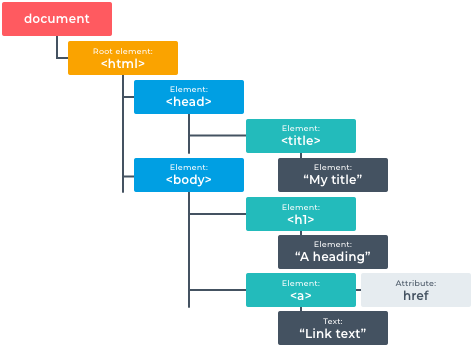
The entire purpose of JavaScript in the context of HTML is to get, set, modify and manipulate parts of the DOM tree in order to add interactivity to your webpages. To do this requires you to effectively navigate the DOM tree so you can access the elements you wish to modify. Luckily, it's not too difficult to do this, since everything is, well, a tree! To access any individual element, all you need to do is drill down to it from the top of the tree.

The DOM can actually be thought of as an upside down tree, where the trunk is at the top and all the branches and leaves hang off the bottom. From here we can make the analogy that:

1. The entire tree (the `document`) lives inside the `window`
2. The trunk of the tree is the `<html>` element, from which all other elements (branches) emanate
3. From the trunk, the tree has two major branches, `<head>` and `<body>`
4. The smaller branches of the tree (links, headings, paragraphs, etc) emanate from either the `<head>` or the `<body>` element
5. Each branch of the tree has a unique path you must take to access it, beginning from the trunk and following the branches to get there
6. At the end of each branch is a leaf. The leaves represent the actual content (text) of the webpage
    
### Document Nodes:
In more technical terms, every item described in the tree above - the elements, branches, leaves and so on - are called **nodes**. What you will actually be doing with JavaScript is navigating around the DOM tree to access different **nodes**, modifying them, deleting them, adding new ones and so on. The nodes represent everything from the HTML element itself to individual HTML elements, paragraphs, links, headings, images, even classes and attributes. In the DOM tree, everything is a node, and each node is an object with properties that can be manipulated, created and deleted. Over the next several units, you'll learn many different methods for accessing and manipulating these DOM nodes with JavaScript.

## Getting Elements by Tag Name
![getting+elements+by+tag+name.png](./img/getting+elements+by+tag+name.png)
The `getElementsByTagName()` method is a method of the `document` object which, as its name implies, gets all elements with a specified tag name. This method (first of many) have the ability to get specific nodes out of the DOM tree so you can assign them to variables, read their values, manipulate them or delete them. The syntax of this method is simple:
```JavaScript
document.getElementsByTagName('tagname');
```
The `getElementsByTagName()` method returns an `HTMLCollection`, which is an array-like object containing all the elements of the tag name you specify. The collection is iterable like an array and thus can be indexed, and also has a few properties and methods such as
- `.item()` which returns the element at the specified index,
- `.length` which returns the number of elements found, and 
- `.namedItem()` which returns an element with the specified `id` attribute if it exists in the collection.

To use the `getElementsByTagName()` method, simply pass it the tag name you wish to find and it will return all the matching elements:
```JavaScript
let allParagraphs = document.getElementsByTagName('p');
```
If you need something more specific, like the first paragraph in the list, a specific one based on its `id`, or the number of paragraphs found, you can access them by attaching the appropriate property or index to the end of the function call, like this:
```JavaScript
let allParagraphs = document.getElementsByTagName('p');
console.log(allParagraphs);                        // The HTMLCollection
console.log(allParagraphs[0]);                     // The first paragraph in the document
console.log(allParagraphs.length);                 // The number of 'p' elements found
console.log(allParagraphs.item(2));                // The 'p' element at index 2 in the collection
console.log(allParagraphs.namedItem('specific'));  // The 'p' element with id="specific"
```

In the runnable example below, there are a number of `HTMLCollections` shown. Because `HTMLCollections` are array-like, they're iterable too, so you can loop through them to perform operations on all of their elements. This and some of the other functionality available is demonstrated in the runnable example below:
```HTML
<body>
    <p>First Paragraph</p>
    <p>Second Paragraph</p>
    <p>Third Paragraph</p>
    <p id="specific">Specific Paragraph</p>
    <script>
        let paragraphs = document.getElementsByTagName('p');
        // All paragraphs
        console.log('The HTMLCollection contains:', paragraphs);
        //Third paragraph access in two ways
        console.log("Item 2 is :", paragraphs.item(2).textContent);
        console.log("Index 2 is:", paragraphs[2].textContent);
        
        // Iterate and print all their texts:
        for(let paragraph of paragraphs) {
            console.log('This is the', paragraph.textContent);
        }
        // Get the specific paragraph, log its id attribute:
        console.log('The specific paragraph has an id of:', paragraphs.namedItem('specific').id);        
    </script>   
</body>
```
![getting+elements+by+tag+name-output.png](./img/getting+elements+by+tag+name-output.png)

## Getting Elements by Class Name
![getting+elements+by+class+name.png](./img/getting+elements+by+class+name.png)
The `getElementsByClassName()` method is nearly identical in functionality to the `getElementsByTagName()` method. It is also a method of the document object and it also returns an `HTMLCollection`, so all the same functionality is available to you. The syntax is identical as well; just pass the method the class name you wish to find:
```JavaScript
document.getElementsByClassName('className');
```
The only difference between the `getElementsByClassName` method and the `getElementsByTagName()` method is that the former returns elements matching the **class** you specify, which could be different types of elements, whereas the latter will return only elements matching that specific type. In other words, if you've got a class like `blue` which you're applying to some `<h1>` elements, some `<p>` elements and some `<div>` elements, using `getElementsByClassName('blue')` will get all three types of elements because they all have `class="blue"`. `getElementsByTagName()` is used to get only one specific kind of element.

To use the `getElementsByClassName()` method, simply pass it the class name you wish to find and it will return all the matching elements:
```JavaScript
let blueThings = document.getElementsByClassName('blue');
console.log(blueThings);                        // The HTMLCollection
console.log(blueThings[0]);                     // The first element with class="blue" in the document
console.log(blueThings.length);                 // The number of elements with class="blue" found
console.log(blueThings.item(2));                // The element at index 2 in the collection
console.log(blueThings.namedItem('specific'));  // The element with both class="blue" and id="specific"
```
Again, because the `HTMLCollection` is array-like, it is iterable and you can loop through it to perform operations on all of its elements.

```HTML
<head>
    <style>  .blue { background: lightblue; color: blue; } </style>
</head>

<body>
    <h1 class="blue">Hello! I'm a blue heading!</h1>
    <h2>...but I'm not...</h2>
    <p class="blue">I'm a blue paragraph. I also have the blue class.</p>
    <button class="blue">Blue buttons will be found too</button>
    <div class="blue" id="blue-div">
        <p>I'm a div with both a class and an id.</p>
    </div>
    <div id="another-blue-div">
        <p>I'm a div with an id, but missing the "blue" class.</p>
    </div>
    <script>
        let blueThings = document.getElementsByClassName('blue');
        // All items with class="blue"
        console.log('The HTMLCollection contains:', blueThings);
        // Iterate and print all their texts:
        for (let blueThing of blueThings) { console.log(blueThing.textContent);}
        // Get a specific index:
        console.log("Index 2 is:", blueThings[2].textContent);
        // Same as above, but using the .item() method:
        console.log("Index 4 is:", blueThings.item(3).textContent);
        // Get the item with class="blue" and id="specific" and log its tag name:
        console.log('The item with id="blue-div" is a', blueThings.namedItem('blue-div').tagName, 'element.');
        // The other div is not in the collection since it doesn't have the "blue" class. 
        // The namedItem() method returns null
        console.log('The item with id="another-blue-div" is', blueThings.namedItem('another-blue-div'));
    </script>
</body>
```
![getting+elements+by+class+name-output.png](./img/getting+elements+by+class+name-output.png)

## Getting Element by ID
![getting+element+by+id.png](./img/getting+element+by+id.png)
The `getElementById()` method gets a specific element: the one with the `id` attribute you specify. This method is slightly different from the other two you've learned in this lesson because it **returns a specific element**, not a collection of elements. While the `id` attribute is supposed to be unique to only one element on the page, in the event that the developer has made a mistake and more than one element is found with the same `id`, this method will return only the first one that matches.

One common slip-up with this method is mistyping it as `getElementsById()` (plural). The easiest way to avoid this is to remember that the method is supposed to return a single element. To use the `getElementById()` method, just pass it the `id` of the element you want to retrieve, and if an element with that value for its `id` attribute exists, it will be returned. If no element exists that matches, it will return `null`:
```JavaScript
// Gets the element with id="third-heading", if it exists (and even if it's not a heading!)
let specificHeading = document.getElementById('third-heading');
```
It's important to remember that this method does not care what type of element it is. It's only looking at the `id` attribute, so the above code would return a paragraph, div, button, heading, or any other element as long as it had `id="third-heading"`. The `getElementById()` method is one of the most commonly used methods in JavaScript when using it to manipulate the DOM.

```HTML
<body>
    <h1 id="first-heading">This is the first heading</h1>
    <h1 id="second-heading">This is the second heading</h1>
    <script>
        let firstHeading = document.getElementById('first-heading');
        console.log('Text content of the first heading is:', firstHeading.textContent);
        let secondHeading = document.getElementById('second-heading');
        console.log('Text content of the second heading is:', secondHeading.textContent);
    </script>
</body>
```
![getting+element+by+id-output.png](./img/getting+element+by+id-output.png)

## Getting elements with CSS NodeSelectors
The `Document` method `querySelector()` returns the **first** Element within the document that matches the specified selector, or group of selectors. If no matches are found, `null` is returned. If you need a list of all elements matching the specified selectors, you should use `querySelectorAll()` instead.

Note: The matching is done using depth-first pre-order traversal of the document's nodes starting with the first element in the document's markup and iterating through sequential nodes by order of the number of child nodes.
```JavaScript
element = document.querySelector(selectors);
```
### selectors
The selector methods accept one or more comma-separated selectors to determine what element or elements should be returned.
A DOMString containing one or more **selectors** to match. This string must be a **valid CSS selector** string; if it isn't, a `SyntaxError` exception is thrown.

For example, to select all paragraph `p` elements in a document whose CSS class is either `warning` or `note`, you can do the following:
```JavaScript
var special = document.querySelectorAll("p.warning, p.note");
```
In this example, the first element in the document with the class `myclass` is returned:
```JavaScript
var el = document.querySelector(".myclass");
```
You can also query by ID. For example:
```JavaScript
var el = document.querySelector("#main, #basic, #exclamation");
```
After executing the above code, `el` contains the first element in the document whose ID is one of `main`, `basic`, or `exclamation`.

Selectors can also be really powerful, as demonstrated in the following example. Here, the first `<input>` element with the name `login` (`<input name="login"/>`) located inside a `<div>` whose class is `user-panel main` (`<div class="user-panel main">`) in the document is returned:
```JavaScript
var el = document.querySelector("div.user-panel.main input[name='login']");
```
As all CSS selector strings are valid, you can also negate selectors:
```JavaScript
var el = document.querySelector("div.user-panel:not(.main) input[name='login']");
```
This will select an `input` with a parent `div` with the `user-panel` class but *not* the `main` class.

## Parents, Children & Siblings
![parents+children+siblings.png](./img/parents+children+siblings.png)
In HTML, all elements are related in some way. The entire DOM tree is a hierarchical, familial structure where parents have children, children have siblings, siblings can have children, children can have other children and so on. This structure is critical to your understanding of how to navigate and manipulate the DOM with JavaScript, and there are several methods available within JavaScript that allow you to access different nodes based on these relationships. In the image here, the `li` elements are both parents and children ... they are children of the `ul` elements and parents to anything contained within them. The `ul` element could also have siblings, and is most likely a child itself of a higher element.

The DOM element object, which represents a specific HTML element, has a number of properties and methods you can use to access its related elements in the DOM tree. Four of the most important properties available are related to finding the element's parent, children and siblings:

* `.parentNode`: Gets the current element's parent node. If the current element is anything other than `<html>`, this property will return the element's parent element. Otherwise, it will return the `document` object.
* `.children`: Returns an `HTMLCollection` of the children elements (anything nested within it in the DOM tree).
* `.firstChild`/`.lastChild`: Finds the first/last child of the given element.
* `.nextElementSibling`/`.previousElementSibling`: Finds the next sibling/previous sibling of the given element, i.e. the closest one at the same nesting level in the DOM tree.

By combining these four methods with your ability to get an element by its tag name, class name or id, you can efficiently navigate inside the DOM and access any element you need. To access the associated property from above on any element, just attach it to the element at hand. For example, consider that we have a div element with an id of `main-div`:
```JavaScript
let mainDiv = document.getElementById('main-div'); // First get the div itself

let parent = mainDiv.parentNode;                   // the div's parent element
let children = mainDiv.children;                   // the div's children
let firstChild = mainDiv.children[0];              // the div's first child
let nextSibling = mainDiv.nextElementSibling;      // the next element at the same nesting level
let prevSibling = mainDiv.previousElementSibling;  // the previous element at the same nesting level
```
Of course, once you've got the above, there's nothing stopping you from getting the children, siblings or parents of the `div`'s children/siblings. You can use these methods to find any element in the entire HTML structure and build collections of related elements which you can then operate on and manipulate.

```HTML
<body>
    <main id="main-div">
        <div class="recipe-title"> <h1>Grandma's Apple Pie</h1> </div>
        <div class="ingredients">
            <ul id="ingredient-list">
                <li class="ingredient">Apples</li>
                <li class="ingredient">Pie Crust</li>
                <li class="ingredient">Brown Sugar</li>
                <li class="ingredient">Cinnamon</li>
            </ul>
        </div>
    </main>
    <footer id="footer-div"> <p>Find us on social media!</p> </footer>

    <script>
        // Get the main element
        let main = document.getElementById('main-div');

        // First child of the main div is the title div
        let titleDiv = main.children[0];
        console.log(titleDiv);

        // First child of the recipe-title div is the h1
        console.log('Recipe is called:', titleDiv.children[0].textContent);

        // Next sibling of the title div is the ingredients div
        let ingredientsDiv = titleDiv.nextElementSibling;
        console.log(ingredientsDiv);

        // And its first child is a <ul> w/ the ingredients:
        let ingredientList = ingredientsDiv.children[0];
        console.log(ingredientList);

        // Now we can get its children and iterate though them:
        let allIngredients = ingredientList.children;
        for (let i = 0; i < allIngredients.length; i++) {
            console.log('Ingredient', i, 'is', allIngredients[i].textContent);
        }
        // Parent of the main-div is <body>
        console.log(main.parentNode);
        // and its sibling is the footer-div
        console.log(main.nextElementSibling);

        // So we could combine all of these to get the footer text easily, even if it had no id/class
        console.log('Footer text is:', 
                    main.parentNode.children[1].children[0].textContent);
        // Of course, since it has an id, you can also do this to access it directly
        console.log('Footer text (alternative method) is:', 
                    document.getElementById('footer-div').children[0].textContent);
    </script>
</body>
```
![parents+children+siblings-output.png](./img/parents+children+siblings-output.png)

## Getting Specific Element Properties
![getting+specific+element+properties.png](./img/getting+specific+element+properties.png)
Once you've accessed the element you want, you can do almost anything you want to manipulate it.

The HTML DOM Element Object is like any other object in JavaScript. It has properties and methods and can be created, read, updated and deleted. Since JavaScript is used to manipulate and modify the DOM, you should know how to access common **element properties** in order to change the elements in the ways you want. Some commonly used element properties are listed below:

|Name	|Description|
|:-|:-|
|`tagName`	|A string representing the tag name of the element, such as `P`, `DIV` or `H1`
|`id`	|The value of the `id` attribute on the element, as a string
|`className`	|The value of the `class` attribute on the element, as a string
|`classList`	|The list of classes in the `class` attribute as an array-like structure which can be iterated
|`attributes`	|A `NamedNodeMap` of all the element's attributes and their values. It can be iterated
|`clientHeight`	|A `Number` representing the inner height of the element
|`clientWidth`	|A `Number` representing the inner width of the element
|`textContent`	|The content inside the element without HTML markup
|`innerHTML`	|The content inside the element including HTML markup
|`outerHTML`	|Same as `innerHTML`, except it includes the element itself as well

All of these properties can be accessed using dot notation. Many of them are mutable and thus can be used to modify the element in whatever way you wish. If the property is not mutable, you can make a copy of it, delete the element and create a new one after modifying the copy and the user will be none the wiser. For a complete list, see the [MDN Website](https://developer.mozilla.org/en-US/docs/Web/API/Element)

```HTML
<head>
    <style>
        #main-box {
            box-shadow: 0px 0px 5px #666;
            border-radius: 4px;
            padding: 10px;
        }
        .grey-text { color: grey; }
        .big-font {
            font-size: 48px;
            font-family: Arial, Helvetica, sans-serif;
        }
        p, span, button { font-family: Arial, Helvetica, sans-serif; }
    </style>
</head>

<body>
    <main id="main-box">
        <h1 class="grey-text big-font">Main Heading</h1>
        <p>This is a paragraph inside a box. The box has an id and inside it is a heading element and this
            paragraph element. The paragraph has no classes or ids but has some styles in style.css. The 
            heading has no id but has a list of classes. Below this paragraph is an input box with a name 
            attribute, a type attribute and an associated button. You can use JavaScript and element 
            properties to get access to all of these things...</p>
        <label for="username-input">Enter a username:</label>
        <input id="username-input" name="username" type="text">
        <button>Submit!</button>
    </main>

    <script>
        // Get the main box
        let box = document.getElementById('main-box');

        // All the box's content
        console.log(box.innerHTML);

        // You can use window.getComputedStyle and pass it an element
        // to get that element's styles as a list of key/value pairs
        console.log("The box's shadow:",       window.getComputedStyle(box).boxShadow);
        console.log("The box's border",        window.getComputedStyle(box).border);
        console.log("The box's border radius", window.getComputedStyle(box).borderRadius);

        // The box's height and width
        console.log('Box height is:', box.clientHeight);
        console.log('Box width is:',  box.clientWidth);

        // The main heading
        let heading = box.children[0];

        // The heading's classes
        console.log(heading.classList);

        // The input box
        let username = document.getElementById('username-input');

        // All the input's attributes
        console.log(username.attributes);

        // To get their name/value, we must iterate
        let attrs = username.attributes;
        for (let i = 0; i < attrs.length; i++) {
            console.log('Attr name:', attrs[i].name, '- Attr value:', attrs[i].value);
        }
    </script>
</body>
```
![getting+specific+element+properties-output.png](./img/getting+specific+element+properties-output.png)

## Writing the Document
![write+document.png](./img/write+document.png)
The `document.write()` method writes content to the HTML document. It can write plaintext, HTML, or JavaScript code. When you call `document.write()` on an existing HTML document, it will replace the entire document including the `<html>` element itself, which means you lose all the CSS, any JavaScript you've loaded, and all of the content.

To use this method, you simply pass it the content you wish to write as a string:
```JavaScript
document.write("<h1>Hello World!</h1>");
```
You can use the `document.write()` method to write JavaScript code as well, like printing the date to the document:
```JavaScript
document.write(Date());
```
`document.write()` can take multiple arguments separated by commas and will print each one in order, but it will not add a new line if you don't use a block level element or you're writing plaintext. To add a new line, you need to add it manually with a `<br>` tag or write with block-level elements like paragraphs, headings and divs. 

Note: in this example we're using the `onclick` attribute on the `button` to call a JavaScript function which actually writes to the document. Don't worry about understanding the intricacies of all this for now; you'll learn about these click events in a future unit. For this unit, the focus is on `document.write()` itself, but if you need to trigger an action such as calling a function on a mouse click, you can do it like this using the `onclick` attribute. 

```HTML
<head>
    <style>
        code {
            background-color: #f5f5f5 !important;
            padding: .5rem;
            width: fit-content;
            box-shadow: 0px 0px 3px #aaa;
            color: red;
        }
    </style>
</head>

<body>
    <h3>The <code>document.write()</code> method writes something to the document.</h3>
    <p>It replaces everything in the document, including the &lt;html&gt; element itself. Click the button below to
        replace this whole document with some new content.</p>
    <button onclick="replace();">Replace this document!</button>

    <script>
    function replace() {
      document.write('<h1>Hello!</h1>');
      document.write("Today is ", Date());
      document.write('<p>Each call to <code>document.write()</code> is appended in order to the document, without newlines.</p>');
      document.write('<p>Notice the css for the &lt;code&gt; tag isn\'t working anymore...</p>');
      document.write('<p>That\'s because the whole document was replaced, including the link to the css file!</p>');
      document.write('The calls above are on new lines because they\'re writing paragraphs and headings. ');
      document.write('If writing plaintext...notice that this method will NOT append a new line after each statement.');
      document.write('<br><br>To do that, you can use break tags');
    }
    </script>
</body>
```
#### Before click
![write+document-before.png](./img/write+document-before.png)
#### After click
![write+document-after.png](./img/write+document-after.png)

## Changing Existing Elements
![changing+existing+elements.png](./img/changing+existing+elements.png)
Over the last few units you've learned several ways to access the different elements in your HTML document using JavaScript. You've also learned how to access their individual properties and attributes such as `clientHeight`, `innerHTML`, `style` and so on. Accessing those is only half the battle though. To really harness the power of JavaScript you need to know how to change those properties. That's what this unit is about. The process for this is straightforward:

1. Get one or more elements using one of the methods you learned in the previous units, such as:
* `document.getElementById()`
* `document.getElementsByClassName()`
* `document.getElementsByTagName()`

2. Set one of its properties, such as 
* adding or changing its `style`, 
* removing or adding an attribute with `removeAttribute()` or `setAttribute()`, or 
* changing its `innerHTML`

While some properties of these HTML elements are read-only, such as `clientWidth` and `clientHeight`, you can usually adjust them in another way. For example, instead of setting the clientWidth which is not possible since that property is read-only, you can set the `Element.style.width` property on the element, like this:
```JavaScript
let myElement = document.getElementById('some-id-attribute');
myElement.style.width = '300px';
```
As you can see it's simple to update the properties of an HTML element. Just get the element, then change whichever property you want. Because you can get entire collections of elements too, you can do this in loops as well! That means if you have a whole series of elements you wish to update in some way, you can use a loop on a collection of elements returned from one of these methods and update an entire group of them with complex logic. This is the real power of JavaScript in the context of manipulating the DOM.

```HTML
<head>
    <style>
        body { font-family: Arial, Helvetica, sans-serif }
        .special {
            color: green;
            font-weight: bold;
        }
        #main-box, #empty-box {
            box-shadow: 0px 0px 5px #666;
            border-radius: 4px;
            padding: 10px;
            margin: 10px;
            min-height: 50px;
        }
        #empty-box { background-color: lightgreen; }
        .note { color: red; }
    </style>
</head>
<body>
    <div id="main-box">
        <h1 id="main-heading">Hello World!</h1>
        <p class="special">You can click the button below to change the properties of these elements. The button will
            remove the formatting class from this paragraph and change the width of the box containing this content.
            It will also add a new heading to the empty green box below, and change its width and background color. 
            All of this is done with JavaScript!</p>
        <button onclick="update();">Click to Update!</button>
        <p class="note"><em>Note: once you click update, you can click the refresh button to reset everything.</em>
        </p>
    </div>
    <div id="empty-box"></div>

    <script>
        function update() {
            let box = document.getElementById('main-box');
            box.style.width = "300px";

            let paragraph = document.getElementsByClassName('special')[0];
            paragraph.removeAttribute('class');

            let emptyBox = document.getElementById('empty-box');
            emptyBox.innerHTML = "<h2>I'm not empty anymore!</h2>"
            emptyBox.style.width = "300px";
            emptyBox.style.backgroundColor = "yellow";
        }
    </script>
</body>
```
#### Before click
![changing+existing+elements-before.png](./img/changing+existing+elements-before.png)
#### After click
![changing+existing+elements-after.png](./img/changing+existing+elements-after.png)

## Adding and Removing Elements
![creating+new+elements.png](./img/creating+new+elements.png)
Along with updating the properties on existing elements, with JavaScript you can create entirely new elements and **append** them to the DOM in whatever location you wish, or you can **remove**, **replace** or **relocate** elements. There are several methods available for you, both as part of the `document` object itself as well as on each individual HTML element object. Some of the most common methods you'll use when creating and removing elements are:

* `document.createElement()`: Create a new element
* `element.appendChild()`: Append an element as the child of another element
* `element.cloneNode()`: Clone an entire element. Pass `true` to "deep clone" which clones its children also
* `element.remove()`: Remove an element from the DOM
* `element.insertBefore(a,b)`: Insert new element `a` before existing element `b`

There is a plethora of ways to use JavaScript to manipulate the DOM by creating and removing elements. These methods are best illustrated with an example.

```HTML
<body>
    <h3>Current Kitchen Stock:</h3>
    <ul>
        <li>Flour</li>
        <li>Sugar</li>
        <li>Spices</li>
    </ul>
    <button onclick="createShoppingList();">Create a Shopping List!</button>

    <script>
        function createShoppingList() {
            // Create a new heading
            let newHeading = document.createElement("h3");
            // Set its innerHTML
            newHeading.innerHTML = "Shopping List:";
            // Add it to the body
            document.body.appendChild(newHeading);
            // Now make the new list
            let shoppingList = document.createElement('ul');
            // Create an array of items to add
            let shoppingItems = ['Milk', 'Butter', 'Eggs'];
            // Loop through the array and create <li> elements
            for (let i = 0; i < shoppingItems.length; i++) {
                let listItem = document.createElement('li');
                listItem.innerHTML = shoppingItems[i];
                shoppingList.appendChild(listItem);
            };
            // Now append the whole new list to the body
            document.body.appendChild(shoppingList);
            // When shopping is completed, clear out the shopping list and add the purchased items to kitchen stock
            let button = document.createElement('button');
            button.innerHTML = "Finished Shopping";
            // Set the onclick attribute to call the addToKitchenStock() function below
            button.setAttribute('onclick', 'addToKitchenStock();');
            // Append it to the body
            document.body.appendChild(button);
        }
        function addToKitchenStock() {
            // First remove the shopping list heading
            let shoppingListHeading = document.getElementsByTagName('h3')[1];
            shoppingListHeading.remove();
            // Get both lists, then iterate through the shopping list's children (the <li> elements),
            // cloning each item and appending it to the kitchen stock list
            let kitchenStock = document.getElementsByTagName('ul')[0];
            let shoppingList = document.getElementsByTagName('ul')[1];
            for (let i = 0; i < shoppingList.children.length; i++) {
                let clone = shoppingList.children[i].cloneNode(true)
                kitchenStock.appendChild(clone);
            }
            // Remove the old shopping list and the buttons
            shoppingList.remove();
            let i = 0;
            while (i < 2) {
                /* This removes the first button in the document each time.
                We need to do it this way since once we delete the first
                one, the 2nd one's index is now 0 */
                document.getElementsByTagName('button')[0].remove();
                i++;
            };
            // Insert a completion note at the top
            let complete = document.createElement('p');
            complete.innerHTML = "Shopping complete!"
            complete.style.color = "red";
            complete.style.fontWeight = "bold";
            let kitchenStockHeading = document.getElementsByTagName('h3')[0];
            document.body.insertBefore(complete, kitchenStockHeading);
        }
    </script>
</body>
```
#### Before click
![creating+new+elements-before.png](./img/creating+new+elements-before.png)
#### After first click
![creating+new+elements-after1.png](./img/creating+new+elements-after1.png)
#### After second click
![creating+new+elements-after2.png](./img/creating+new+elements-after2.png)

## `innerHTML`
Sometimes it becomes quite tedious to create, clone, remove, replace and relocate lots of elements with JavaScript when you're trying to update the DOM. When this happens, as usual, there's a better way. The `innerHTML` property allows you to get or set the entire internal HTML contents of an HTML element. If that element contains other HTML, the `innerHTML` property will replace it if you set it, or return all the HTML if you get it. Like all the other properties on an element, it's simple to use. Here's how you can both get and set this property after using one of the many methods to retrieve an element:
```JavaScript
let myElement = document.getElementById('some-id');

// GET the innerHTML:
let html = myElement.innerHTML;
console.log(html);  // Whatever HTML was already in the element

// SET the innerHTML (this replaces it)
myElement.innerHTML = "<h1>Hello world!</h1>"
```
This property exists on every element in the DOM tree, right up to the `<html>` element itself. If you are working with a low level element such as a heading or something that just has some text in it, the `innerHTML` property will return the text content of the element. You can also set the `innerHTML` property to simple plaintext; it doesn't have to be HTML. The real power of this property, though, is in its ability to replace the entire contents of an element with complex HTML, such as replacing all the contents of a `div` with a whole bunch of new HTML. To create this new HTML, you can use template literals, which you learned about in the strings lesson. Just surround all your HTML with backticks!
```JavaScript
let myDiv = document.createElement('div');
let html = `
  <h1>Hello!</h1>
  <p>Here is some complex HTML that will be inserted into this div.</p>
  <p>It contains a heading, paragraphs, and even a list with a class.</p>
  <ul class="special-list">
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
  </ul>
`;
myDiv.innerHTML = html;  // The div will now render all the above HTML!
```
You probably noticed that in the last runnable example it was quite involved just to add a simple unordered list with a few items to the DOM. First you had to create every single element, set all their values, set their attributes, and on top of everything when it was all done it was in the wrong place so you had to use another function to move it! It would have been much easier to do this by simply creating a `div` to contain the shopping list, updating the `div`'s `innerHTML` property like above, and then inserting the whole `div` into the document in the appropriate place. In the following example, the exact same logic is achieved using only a few lines of code. Notice the use of backticks (\`\`) to create the template literal. This is very common when writing HTML in your JavaScript to be added via the `innerHTML` property. You'll also see in the example below that the button to add the shopping list doesn't need to be removed because it will always insert a new list just above itself! If you wanted, you could also write some logic to check if the list is already on the page and if so, replace it rather than adding another one.

```HTML
<body>
    <h3>Current Kitchen Stock:</h3>
    <ul>
        <li>Flour</li>
        <li>Sugar</li>
        <li>Spices</li>
    </ul>
    <button onclick="createShoppingList();">
        Create a Shopping List!
    </button>

    <script>
        function createShoppingList() {
            // Create a div to hold everything
            let shoppingListDiv = document.createElement('div');

            // Set the div's innerHTML to the shopping list
            // Notice the use of backticks (``) to create a multiline string
            shoppingListDiv.innerHTML = `
                <h3>Shopping List:</h3>
                <ul>
                  <li>Milk</li>
                   <li>Butter</li>
                   <li>Eggs</li>
                </ul>
            `;
            // Find the first button and insert the div before it
            let firstList = document.getElementsByTagName('button')[0];
            document.body.insertBefore(shoppingListDiv, firstList);
        }
    </script>
</body>
```
#### Before click
![innerhtml-before.png](./img/innerhtml-before.png)
#### After click
![innerhtml-after.png](./img/innerhtml-after.png)

# Events

## Click Events
![click+events.png](./img/click+events.png)
An important concept when working in JavaScript is the concept of **events**. Events represent the user taking some action, or more generically, something happening within the context of JavaScript and the browser. Examples of things that could be events in JavaScript are the user clicking the mouse, scrolling up or down the page or pressing a key on the keyboard; an input box being changed; the page load completing and so on. In JavaScript, these events allow you to execute code in response to user actions and other situations that occur naturally during the process of using the browser.

There are hundreds of events. Just take a look at this [event list](https://developer.mozilla.org/en-US/docs/Web/Events) in the MDN Event Reference! There's no way we could teach you all the possible events in a single course like this, and besides, there's no way anyone could remember them all anyway. Instead, we'll focus on the most common events you'll use to get started with handling user interaction in JavaScript, and you'll learn the rest through experience as you need them. One of the most common and useful events is the `click` event, because it allows you to both capture when the user has clicked on something as well as to simulate a user clicking on something with JavaScript.

There are two primary ways to utilize click events in JavaScript:
1. Capturing a click event and executing some code in response to it
2. Simulating a click event in order to trigger some action in the browser

We actually used this event in the last lesson to capture the click of the buttons which modified the DOM. If you look back at those examples you'll see that each of the buttons has an `onclick` attribute which calls one of the functions written in the `<script>` tags. This is the most common and straightforward way to capture a click event on a specific element and is usually what you will use this event for. After all, you probably don't want to capture every click, but rather specific clicks on specific items so you can respond accordingly with your JavaScript code. The following button, for example, will trigger an alert when clicked:

<button onclick="alert('Hello! You clicked the button!');">
  Click to Trigger Alert!
</button>

Here's the source code for it:
```HTML
<button onclick="alert('Hello! You clicked the button!');">
  Click to Trigger Alert!
</button>
```
Of course, if you want to do anything more complex than a single line or two of JavaScript it's better to create a function like we did in the previous lesson's examples, and call the function on the click event instead.

### Triggering a Click:
Each element in the DOM has a `click()` method as well, which allows you to simulate a click on that element. The simplest way to demonstrate this is by creating a clickable checkbox and using a button to simulate the user clicking on it:

<input id="check" type="checkbox" />
<button onclick="document.getElementById('check').click();">
    Click the Checkbox!
</button>
  
Here's the code for the above:
```HTML
  <input id="check" type="checkbox" />
  <button onclick="document.getElementById('check').click();">
    Click the Checkbox!
  </button>
```
Here you can see that it doesn't matter which you click on, the button or the checkbox. Both will select or deselect the checkbox appropriately because the checkbox just behaves normally, and the button's `onclick` attribute triggers a call to the checkbox's `click` method when you click it.

To summarize, here is a table containing the most common mouse events used when tracking mouse clicks:

|Event/Property	|Description
|:-|:-|
||**EVENTS**
|`onclick`	|The event occurs when the user clicks on an element
|`oncontextmenu`	|The event occurs when the user right-clicks on an element to open a context menu
|`ondblclick`	|The event occurs when the user double-clicks on an element
|`onmousedown`	|The event occurs when the user presses a mouse button over an element
|`onmouseup`	|The event occurs when a user releases a mouse button over an element
||**PROPERTIES**
|`button`	|Returns which mouse button was pressed when the mouse event was triggered

There are countless reasons you'll find throughout your development career to both capture and trigger mouse clicks, so remember these two tricks as you move forward. The example below demonstrates that click events work all over the place, on every element!

```HTML
<head>
    <style>
        #lowly-div {
            width: 100px;
            padding: 10px;
            border: 1px solid black;
            background-color: lightyellow;
        }
    </style>
</head>

<body>
    <div id="lowly-div" onclick="alert('You clicked the lowly div!');">
        <p>Though I am but a lowly div, you can still click me</p>
    </div>
    <p onclick="alert('You clicked the paragraph');">
        Paragraphs have click events also...everything does! Click me!
    </p>
    <p>The button below calls the changeBox() function in script.js:</p>
    <button onclick="changeBox();">Change the Lowly Div!</button>

    <script>
        function changeBox() {
            // Get the div
            let lowlyDiv = document.getElementById('lowly-div');
            /* We can check the box to determine its width and
            change colors accordingly. 120 = 100px + 10px padding
            on each side. Check style.css */
            if (lowlyDiv.clientWidth === 120) {
                // Change its background color and width
                lowlyDiv.style.backgroundColor = "lightgreen";
                lowlyDiv.style.width = '200px';
            } else {
                // Change it back to normal
                lowlyDiv.style.backgroundColor = "lightyellow";
                lowlyDiv.style.width = '100px';
            }
        }
    </script>
</body>
```
#### Before click
![click+events-before.png](./img/click+events-before.png)
#### After clicks
![click+events-after1.png](./img/click+events-after1.png) ![click+events-after2.png](./img/click+events-after2.png) ![click+events-after3.png](./img/click+events-after3.png)

## Mouse Movements & Scrolling
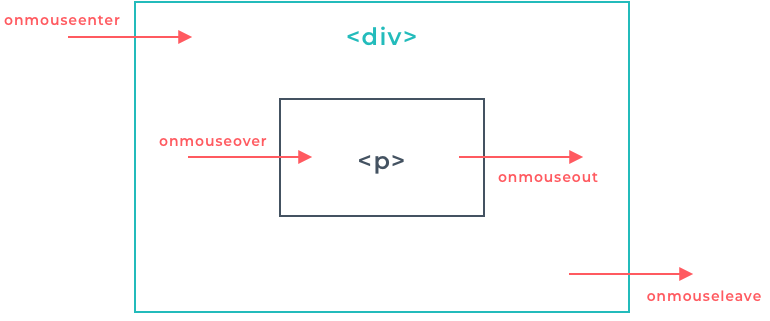
Another common requirement when manipulating the DOM and responding to user actions is capturing mouse movements. These movements include the mouse moving over an element (`onmouseover`/`onmouseenter`), off of an element (`onmouseout`/`onmouseleave`), scrolling (`onscroll`) and moving around while over an element (`onmousemove`). The `MouseEvent` object which provides this functionality has several properties which are useful when tracking the mouse, such as `clientX` and `clientY`, which return the `X` and `Y` coordinates of the mouse respectively (relative to the window).

To summarize, here is a table containing the most common mouse events used when tracking mouse movements:

|Event/Property	|Description|
|:-|:-|
||**EVENTS**
|`onmouseenter`	|The event occurs when the pointer is moved onto an element
|`onmouseleave`	|The event occurs when the pointer is moved out of an element
|`onmousemove`	|The event occurs when the pointer is moving while it is over an element
|`onmouseout`	|The event occurs when a user moves the mouse pointer out of an element, or out of one of its children
|`onmouseover`	|The event occurs when the pointer is moved onto an element, or onto one of its children
|`onscroll`	|The event occurs when an element's scrollbar is being scrolled, or when scrolling with the mouse/trackpad.
||**PROPERTIES**
|`clientX`	|Returns the horizontal coordinate of the mouse pointer, relative to the current window, when the mouse event was triggered
|`clientY`	|Returns the vertical coordinate of the mouse pointer, relative to the current window, when the mouse event was triggered

For examples of these events, see the runnable example below. Pay attention to these points as you go through this example:

1. All the events that are used in the HTML file (`onmouseenter`, `onmouseleave`, etc) utilize the same function to handle the event: `handleEvent()`
2. Each time that function is called in the HTML to handle one of these events, we pass it a parameter called `event`
3. The `event` parameter is implicitly defined for all events, so if you're wondering where it came from or what it represents, it's built in and it represents the actual event that occurred (like a click, the mouse moving, or scrolling)
4. This `event` parameter is used inside `handleEvent()` to reference the event that triggered the function. That's how we can get the type of event that triggered it and handle all those different events with a single function!

```HTML
<head>
    <style>
        #box1, #box2, #box3, #box4 {
            margin: 10px;
            width: 200px;
            height: 200px;
            background: lightblue;
            border: 1px solid black;
            padding: 10px;
        }
        #box3 { overflow: scroll; }
        #paragraph1, #paragraph2, #paragraph4 { background: lightyellow }
        #mouse-position { color: green; }
    </style>
</head>

<body>
    <h3>onmouseover:</h3>
    <div onmouseover="handleEvent(event);" onmouseout="handleEvent(event);" id="box1">
        <p id="paragraph1">Move the mouse over this box and watch the console. 
            It logs to the console when you move into/out of this box and its child paragraph.</p>
    </div>

    <h3>onmouseenter:</h3>
    <div onmouseenter="handleEvent(event);" onmouseleave="handleEvent(event);" id="box2">
        <p id="paragraph2">This box will log to the console when you enter or leave it, but not when you
            move over this paragraph.</p>
    </div>

    <h3>onscroll:</h3>
    <div onscroll="handleEvent(event);" id="box3">
        <p id="paragraph3">Lorem ipsum dolor sit amet consectetur adipisicing elit. Earum voluptatibus in impedit
            dolores amet similique molestiae ut iusto veritatis ullam nobis possimus ratione, quae dolorum culpa 
            tempora nihil? Adipisci dolor similique quae. Quas provident beatae quisquam error sequi est sint 
            architecto dolore reiciendis aliquid! Dolorem repudiandae, id repellat consectetur pariatur animi 
            recusandae laudantium. Neque rem magni dolor architecto veniam officia, possimus non optio quo 
            voluptates explicabo atque quisquam quos doloribus odio vitae eligendi laudantium aliquid eum 
            blanditiis quas numquam nihil iusto cupiditate. Corrupti magni voluptatem rem recusandae amet deserunt 
            animi repellat beatae. Provident modi a quae, laborum laboriosam enim iste?</p>
    </div>

    <h3>Mouse position: <span id='mouse-position'></span></h3>
    <div onmousemove="handleEvent(event);" id="box4">
        <p id="paragraph4">Whenever you're moving the mouse in this box, 
            it'll log the mouse's (x,y) coordinates to the span above..</p>
    </div>

    <script>
        function handleEvent(event) {
            if (event.type === 'mousemove') {
                let position = '(' + event.clientX + ',' + event.clientY + ')';
                let positionHolder = document.getElementById('mouse-position');
                positionHolder.innerHTML = position;
            } else {
                console.log(event.type, event.target.attributes.id.value, 'happened!');
            }
        }
    </script>
</body>
```

### `onmousover` and `onmouseout`
![onmouseover-1.png](./img/onmouseover-1.png) ![onmouseover-2.png](./img/onmouseover-2.png) ![onmouseover-3.png](./img/onmouseover-3.png) ![onmouseover-4.png](./img/onmouseover-4.png)

### `onmouseenter` and `onmouseleave`
![onmouseenter-1.png](./img/onmouseenter-1.png) ![onmouseenter-2.png](./img/onmouseenter-2.png)

### `onscroll`
![onscroll.png](./img/onscroll.png)

### Mouse position
![mouse-position.png](./img/mouse-position.png)

## Loading Events
![loading+events.png](./img/loading+events.png)
JavaScript loading events allow you to track when content on the page has completed loading.

There are a few common loading events that you should know in your JavaScript journey. These events are fired every time an HTML page is loaded and provide you with a way to track when certain elements in the page have completed loading. This is known as the "lifecycle" of an HTML page. The four main events that you will encounter are:

1. `DOMContentLoaded`: The DOM content has finished loading, but external assets like images, JS files, CSS files and so on have not loaded yet.
2. `load`: Everything is now loaded. This event fires on the `window`
3. `beforeunload`: Fired just before the user leaves the page. This can allow you to confirm whether the user really wants to leave the page.
4. `unload`: Fired when the user has confirmed they want to leave the page.

The event you are most likely to use is the `window.onload` event, which allows you to execute some JavaScript code immediately after you've confirmed everything on the page is loaded. This is useful for those times when you want to automate some sort of action every single time the page loads, such as initiating a popup, populating DOM elements with content, or rendering some content that depends on something else being loaded first. In the HTML lifecycle, the `document` will always complete loading before the `window`, and you can use the `onload` event on both objects. To use this event, just set the `onload` property on the `window` to whatever JavaScript you would like to execute:
```JavaScript
window.onload = console.log('The window has loaded!');
```
Or more practically, execute a function:
```JavaScript
function myFunction() {
  console.log('The window has loaded!');
  // You can do anything you want in here!
}
window.onload = myFunction();
```
You can also attach the `onload` event to a specific element by using it as an attribute. This can allow you to determine when certain content is loaded, such as if you wanted to determine when a specific script or image has finished loading:
```JavaScript
function myFunction() {
  console.log('This will fire when the body is loaded');
}
<body onload="myFunction();"></body>
```
Due to event *bubbling* in JavaScript, logging these messages to the console may not always occur in the correct order and thus it's best to just use `window.onload` to determine when the page is completely loaded, and `window.onbeforeunload` and `window.onunload` for determining what to do when a user exits the page. You can see this phenomenon in the following runnable example, where the body's `onload` event bubbles up to the `document`, causing the `document`'s `console.log` to be printed first. Regardless of this, it demonstrates the usefulness of tracking the different loading events in JavaScript:

`index.html`:
```HTML
<body onload="bodyLoaded();">
    <h1>Look at the console!</h1>
    <img  src="https://codeinstitute.s3.amazonaws.com/HTMLEssentials/lg-file.jpg" 
          onload="console.log('The image has loaded');"
          alt="Photograph of a man drinking coffee at his laptop">
    <script onload="console.log('The script has loaded!');" src="script.js" type="text/javascript">
    </script>
</body>
```
`script.js`:
```JavaScript
document.onload = console.log('The document has loaded!');
function bodyLoaded() { console.log('Body has loaded!'); }
```
![loading+events-output.png](./img/loading+events-output.png)

## Change Events
![change+events.png](./img/change+events.png)
Knowing how to capture click events, mouse movements and loading events is great, but there are other types of events you must know in order to take advantage of everything JavaScript has to offer. Another type of event you'll need to be familiar with is the `change` event, which you can capture with the `onchange` event handler. This event is fired when certain elements change, in particular `<input>` and `<select>` elements. These events allow you to capture when a user has changed something in a form and respond accordingly, allowing you to handle powerful operations like **live form validation**.

The `onchange` event handler is simple to use. Like all the other events, you can simply attach it to one of the supported elements (either an `<input>` or a `<select>` element) as an attribute, and set the attribute equal to some JavaScript code or a function you'd like to call:
```HTML
<input type="text" onchange="console.log('You changed the text box!');">
```
If you're working with a dropdown box, the syntax is the same but the event will fire whenever the option in the box is changed by a user changing it with the mouse or the keyboard:
```HTML
<select name="my-select" id="my-select" onchange="console.log('You changed the select box!');">
  <option value="1">1</option>
  <option value="2">2</option>
  <option value="3">3</option>
  <option value="4">4</option>
</select>
```
One key thing to recognize about the `change` event is that it is **not** fired when changing elements programmatically. It's intended to capture changes that are committed to by the user, such as typing something into a text box and then moving on to a different part of the form, so it will only be fired once the typing is complete or the select box or other input has been completely changed to the new value. This event is immensely powerful and can be used for all sorts of things to make your websites more interactive. Here is a runnable example demonstrating the above two snippets:

```HTML
<head>
    <style>div {margin: 10px;}</style>
</head>
<body>
    <h1>Fill out the form!</h1>
    <div>
      <label for="my-input">Enter some input:</label>
      <input id="my-input" type="text" oninput="console.log('You changed the text box!');">
    </div>
    <div>
      <label for="my-select">Select an option:</label>
      <select name="my-select" id="my-select" onchange="console.log('You changed the select box!');">
        <option value="1">1</option>
        <option value="2">2</option>
        <option value="3">3</option>
        <option value="4">4</option>
      </select>
    </div>
</body>
```
#### After entering `i`
![change+events-output1.png](./img/change+events-output1.png)
#### After entering `n`
![change+events-output2.png](./img/change+events-output2.png)
#### After entering `p`
![change+events-output3.png](./img/change+events-output3.png)
#### After selecting option `3`
![change+events-output4.png](./img/change+events-output4.png)

## Keyboard Events
![keyboard+events.png](./img/keyboard+events.png)
So far you've learned how to capture mouse events, loading events, and change events. Another way users interact with websites is via their keyboards, and those events can be captured as well. All events that occur when user presses a key on the keyboard belong to the `KeyboardEvent` object and this object has a number of properties and methods similar to the `MouseEvent` object. The most common keyboard events you will capture are:

`onkeypress`: A user has pressed a key on the keyboard
`onkeydown`: A user has pressed a key down, but not released it yet
`onkeyup`: A user has released a key which was previously pressed down

By capturing these three events and combining them with the other properties and methods available on the `KeyboardEvent` object, it's possible not only to tell whether a user has pressed a key on the keyboard, but also to tell how long they held it down, specifically which key was pressed, whether they've released it yet and more. This makes it possible for you to add interactivity to your pages that executes not only for simple things like clicking but also for complex situations like, "The user clicked and dragged while holding `ctrl`+`alt`" or "the user has pressed `shift`+`I`". This is often how popular websites you probably use every day create all those awesome keyboard and clicking shortcuts! Here is a table summarizing all the possible `KeyboardEvent` properties and methods. To access these, you can pass the `event` parameter to your event handler function (the function that gets called when the event happens) as described in the mouse movements and scrolling unit, then access them using dot notation (e.g. `event.key`):

|Property/Method	|Description
|:-|:-|
|`altKey`	|Returns whether the `ALT` key was pressed when the key event was triggered
|`shiftKey`	|Returns whether the `SHIFT` key was pressed when the key event was triggered
|`ctrlKey`	|Returns whether the `CTRL` key was pressed when the key event was triggered
|`code`	|Returns the code of the key that triggered the event
|`charCode`	|Returns the Unicode character code of the key that triggered the event
|`key`	|Returns the key value of the key represented by the event
|`keyCode`	|Returns the Unicode character code of the key that triggered the `onkeypress` event, or the Unicode key code of |`metaKey`	|Returns whether the `meta` key was pressed when the key event was triggered
|`getModifierState()`	|Returns `true` if the specified key is activated
|`isComposing`	|Returns whether the state of the event is composing or not the key that triggered the `onkeydown` or `onkeyup` event
|`which`	|Returns the Unicode character code of the key that triggered the `onkeypress` event, or the Unicode key code of the key that triggered the `onkeydown` or `onkeyup` event
|`location`	|Returns the location of a key on the keyboard or device
|`repeat`	|Returns whether a key is being hold down repeatedly, or not

The following example demonstrates the functionality of JavaScript keyboard events. Here are some things to think about as you work through the code:

1. What's the purpose of passing the `event` parameter to the `handleKeys()` function in `index.html`?
2. What do you think would happen if you eliminated the `if(event.repeat)` block returns false?
3. Can you think of another way to write lines `currentKeySpan.innerHTML=...`? Maybe using template literals?
4. Why do we need `setTimeout()`? What would happen if you removed it or changed 75 to 1000?

```HTML
<head>
  <style>
    div {
      display: inline-flex;
      width: 60px;
      height: 60px;
      border: 1px solid black;
      margin: 10px;
      padding: 20px;
      text-align: center;
    }
  </style>
</head>

<body onkeypress="handleKeys(event);" onkeydown="handleKeys(event);" onkeyup="handleKeys(event);">
  <div id="key-pressed"><p>Pressed</p></div>
  <div id="key-down"><p>Down</p></div>
  <div id="key-up"><p>Up</p></div>
  <h2>Click in the body, then start typing:</h2>
  <h3>Current key pressed: <span id="current-key"></span></h3>
  <h3>Last key pressed: <span id="last-key"></span></h3>
  <p><em>Note: In the body element we are passing the event to the <code>handleKeys()</code> function.
      This allows you to use the properties and methods described in the text, such as <code>event.key</code>,
      <code>event.repeat</code>, etc.</em></p>
  <script>
    function handleKeys(event) {
      let pressedDiv     = document.getElementById('key-pressed');
      let downDiv        = document.getElementById('key-down');
      let upDiv          = document.getElementById('key-up');
      let currentKeySpan = document.getElementById('current-key');
      let lastKeySpan    = document.getElementById('last-key');
      if (event.repeat) {
        return false;  // prevents holding the key from triggering the event again 
      } else {
        switch (event.type) {
          case 'keydown':
          case 'keypress':
            downDiv.style.backgroundColor    = 'lightgreen';
            pressedDiv.style.backgroundColor = 'lightgreen';
            currentKeySpan.innerHTML = event.key + ' (' + event.code + ' / ' + event.keyCode + ')';
            break;
          case 'keyup':
            downDiv.style.backgroundColor    = 'white';
            pressedDiv.style.backgroundColor = 'white';
            upDiv.style.backgroundColor      = 'lightgreen';
            // This just changes the upDiv back to white after 75ms
            setTimeout(function () { upDiv.style.backgroundColor = 'white'; }, 75);
            currentKeySpan.innerHTML = '';
            lastKeySpan.innerHTML    = event.key + ' (' + event.code + ' / ' + event.keyCode + ')';
        }
      }
    }
  </script>
</body>
```

### Before
![keyboard+events-output1.png](./img/keyboard+events-output1.png)
### After pressing `;`
![keyboard+events-output2.png](./img/keyboard+events-output2.png)
### After releasing `;`
![keyboard+events-output3.png](./img/keyboard+events-output3.png)
### After pressing `Shift`+`;`  (`:`)
![keyboard+events-output4.png](./img/keyboard+events-output4.png)
**Observe**: A key has only one name (`event.code`), e.g. `Semicolon`, but depending on wether the `Shift` key was also pressed, returns different `event.keyCode`: 59 for `;` or 58 for `:`

## Adding Event Listeners
![adding+event+listeners.png](./img/adding+event+listeners.png)
Up to this point all the listeners you've created to listen for JavaScript events have been created via HTML attributes such as `onclick`, `onchange` and so on. These event listeners work just fine, but they can make your code messy and verbose when you've got a lot of them. Fortunately as with most things in code, when things become too verbose it's indicative that there's a better way. This time, the better way is through the use of **event listeners**.

An event listener sets up a function that will be called whenever the specified event, such as an input change, a click, a mouse movement, a keypress or other such event is delivered to the target. The target in this context is anything that supports events, but commonly will be something like an HTML element, the `document` or the `window`. Event listeners allow you to remove those verbose HTML attributes and instead put all the functionality in JavaScript. This is good for separation of concerns too, since even though JavaScript and HTML go hand in hand, their code should still be as segregated as possible to limit complexity and increase maintainability.

To add an event listener to an object you need three things:

1. The object to add the event listener to, like an element, the `document` or the `window`
2. The `addEventListener()` method, which takes two parameters described below
3. The **listener**, which is a function (aka. **callback function**) to run when the event is received and which takes the event itself as a parameter

As a simple example, if you have a button you want to use to run some JavaScript code when it's clicked, the `button` is the object and you can pass `addEventListener()` the `click` event and the function to run when triggered. This might sound complex, but it's actually quite simple. Here is the generic syntax for adding an event listener:
```JavaScript
target.addEventListener(type, listener [, options]);
```
The `options` are parameters you can specify to make your listener behave differently, but they're not required to create it. You can pass `options` such as whether to only invoke the listener on the first event it receives and then destroy it, whether it will prevent the default action of the original object and so on. Don't worry about that stuff for now though; what you need to know right now is just how to add a simple listener for an event, and everything else you can pick up as you need to create more complex listeners. The following compares the way you've seen things done thus far with the way they should be done as a best practice:

Without an event listener, using HTML attributes:
```HTML
<button id="my-button" onclick="console.log('You clicked the button!')">Click me!</button>
```
Using an event listener:<br>
HTML:
```HTML
<button id="my-button">Click me!</button>
```
JavaScript:
```JavaScript
function myFunction (event) {
  console.log('You clicked the button!');
  console.log(this.id);  // my-button
}
let myButton = document.getElementById('my-button');
myButton.addEventListener('click', myFunction);
```
There are a few important things to note here:
1. The listener itself, `myFunction()` in this case, takes the event as a parameter. That means that if you need to get any information about the event, such as its type, name, properties or anything else, you can get it using dot notation.
2. When passing the listener to the `addEventListener()` method, it is passed **without parentheses**. This is vitally important because if you pass the function with parentheses it will be called immediately instead of when the event is received! Remember that you are passing the function itself as the thing to do when the event happens, not calling the function right then and there.
3. Inside the listener, the value of `this` is the object that triggered the event. In most cases that you use this functionality, that will mean that `this` refers to the element, so you can get things like `this.id`, `this.classList` or any other element property.

You can have as many event listeners as you want, and every element can have multiple listeners listening to different kinds of events, but you should never have two listeners for the same event on the same element executing different callback functions. This will cause one of them to be discarded and will result in unpredictable behavior. The runnable example below demonstrates how to add and use a few different types of event listeners. Take note of the value of `event.target` during each event, that is the actual element that event was triggered on!

```HTML
<head>
  <style>
    div {
      margin-top: 25px;
      margin-bottom: 25px;
      padding: 10px;
      height: 100px;
      width: 250px;
      background-color: lightblue;
      border: 1px solid black;
    }
  </style>
</head>

<body>
  <button id="magic-button">Click me!</button>
  <div id="magic-div"><p>Mouse over me!</p></div>
  <input id="magic-input" type="text" placeholder="Type something into me">

  <script>
    function logEvent(event,message){
      console.log('Received the ' + event.type + " event!");
      console.log('"this" currently refers to', event.target.id);
      console.log(message);
    }
    function handleBtnClick(event)     {logEvent(event,'You clicked the button!\n'); }
    function handleInputKeys(event)    {logEvent(event,'You changed the textbox!\n'); }
    function handleDivMouseOver(event) {logEvent(event,'You moved the mouse over the div!\n');}
    
    let magicButton = document.getElementById('magic-button');
    magicButton.addEventListener('click', handleBtnClick); // left clicks
    magicButton.addEventListener('contextmenu', handleBtnClick); // right clicks
    let magicDiv = document.getElementById('magic-div');
    magicDiv.addEventListener('mouseover', handleDivMouseOver); // mouseovers
    let magicInput = document.getElementById('magic-input');
    magicInput.addEventListener('keypress', handleInputKeys); // key presses 
    magicInput.addEventListener('keydown', handleInputKeys); // key down
    magicInput.addEventListener('keyup', handleInputKeys); // key up
  </script>
</body>
```
### After clicking on the button
![adding+event+listeners-output1.png](./img/adding+event+listeners-output1.png)
### After mouse pointer entered blue box
![adding+event+listeners-output2.png](./img/adding+event+listeners-output2.png)
### After entering `i` into the input field
![adding+event+listeners-output3.png](./img/adding+event+listeners-output3.png)

## Working With JavaScript Functions
Throughout this module you've seen functions used for a few different things. One of the most common ways developers use functions is for handling JavaScript events, because they allow you to keep your code concise, reusable and easy to maintain. In the last unit, you saw how it's possible (and preferred) to write JavaScript functions that act as event listeners so that you can keep your JavaScript and HTML segregated and clean. With this in mind, in this unit we'll dive a little deeper into what else is available when working with these functions.

When working with event handlers, a few of the things you might want to ask yourself are:

1. Which event was or will be fired, and what caused/will cause it to be fired?
2. What do I want to happen in response to this event?
3. Which element or elements is the response going to affect, or if it won't change any elements, what will it do for the user?
4. What information do I need to be able to handle the event correctly?
5. Where can I get the information needed (from the event itself, from the element/window/document, or somewhere else)?

To demonstrate, there are two major concepts you should understand about working with functions and event handlers in JavaScript:

#### Concept 1: The event is accessible in the function:
You saw in the keyboard events unit that it was possible not only to determine that the user pressed a key on the keyboard, but also whether they were holding it down, when they released it, which key they pressed, and a host of other things. All of this information came from the `event` object that was passed to the event handler (i.e. the function that was executed). The `KeyboardEvent` object has specific properties related to keyboard events and the same is true for the other types of events. You can use the `event` object in the function that handles the event to get more information about exactly what happened and respond accordingly.

#### Concept 2: The element is accessible in the function:
You also saw in the last unit that when you create an event listener using the `addEventListener()` method, inside of the event handler `this` refers to the object that you attached the listener to. This is very useful to know because it means that in the callback function that actually handles the event, you can access the event type and all its properties and methods as well as the element that triggered it, which gives you access to everything about that element: its type, height, width, behaviors, id, classes, location in the DOM and so on.

Understanding these two concepts is the key to understanding how to manipulate the DOM in response to JavaScript events.

# Working with Forms

## Getting Form Values
![getting+form+values.png](./img/getting+form+values.png)
Working with forms in JavaScript is a critical part of adding interactivity to websites. With JavaScript, you can not only get and set the values of different form fields, but also handle form submission and submit forms automatically. Forms don't necessarily need to be submitted to a server either: you can capture the `onsubmit` event and execute JavaScript in response to it, which means you can use forms to add, update, and remove DOM elements and manipulate the DOM in the same ways you can with button clicks, mouse movements and other events.

The first step to understand how to work with forms in JavaScript is to learn how to get the values that a user has submitted. Take a simple login form for example:
```HTML
<form method="POST" action="/login/">
  <div class="username">
    <label for="username">Username:</label>  
    <input type="text" id="username" name="username">
  </div>
  <div class="password">
    <label for="password">Password:</label>
    <input type="password" id="password" name="password">
  </div>
  <input type="submit" value="Login" />
</form>
```
In the above form, the `username` and `password` fields will be submitted to the `/login/` URL on the server. On the server side, you would most likely access their values via the `name` attribute, which would be submitted as part of the `POST` request. With JavaScript you can access those values on the client side by getting the elements by their `id` and then accessing their `value` attribute. This allows you to manipulate, validate or do anything else you wish with the values before submitting them, or prevent submission altogether and do something else:
```JavaScript
let user = document.getElementById('username');
console.log(user.value);
let pass = document.getElementById('password');
console.log(pass.value);
```
Most form fields can be accessed in this way, but keep in mind that for some fields like checkboxes and multi-selection dropdowns, you may need to use more complex logic to access their values or whether or not they are "selected". You'll learn more about these other form operations as you write more complex code, and there are also JavaScript libraries that can serialize an entire form into a nice JavaScript object in a single line of code for these more complex situations! The basic example above is demonstrated in the runnable example below, where we've added an event listener to listen to the `submit` event on the form, and when it's triggered, execute a JavaScript function called `handleSubmit()`. The important thing to understand now is that a **form element in your HTML is no different than any other element**. It has attributes, properties and methods, all of which are accessible and mutable via JavaScript:

```HTML
<body>
  <p>Fill out and submit the form below. When you click "Login" the default action will be prevented and instead the
    <code>handleSubmit()</code> function will capture the input values and log them to the console.
  </p>
  <form id="login-form" method="POST" action="/login/">
    <label for="username">Username:</label>
    <input type="text"     id="username" name="username">
    <label for="password">Password:</label>
    <input type="password" id="password" name="password">
    <input type="submit"   value="Login" name="submitbutton"/>
  </form>

  <script>
    // This gets the form and attaches an event listener to it
    let form = document.getElementById('login-form');
    function handleSubmit(event) {
      // Prevent the default submit action (more on this in a couple units)
      event.preventDefault();
      // Get input elements and log their values to the console
      for (let node of form.elements){
        console.log(node.name+':', node.value); 
      }
    }
    // attach event listener
    form.addEventListener('submit', handleSubmit);
  </script>
</body>
```
### After clicking on the `Login` button
![getting+form+values-output.png](./img/getting+form+values-output.png)

## Prepopulating Form Fields
![prepopulating+form+fields.png](./img/prepopulating+form+fields.png)
Of course because an input element in an HTML form is no different than any other element, it's possible to set the `value` attribute as well as getting it, using JavaScript. This means that just like you can get values out of a form, you can put values into a form as well. This is useful for all sorts of things, from adding a little convenience for your users to creating fully interactive forms that build themselves as the user fills them out.

Consider an example such as a contact form, where a registered user might need to fill out their username, their email address and a message:
```HTML
<form method="POST" action="/contact-us/">
  <label for="username">Username:</label>  
  <input type="text" id="username" name="username">
  <label for="email">Email:</label>
  <input type="email" id="email" name="email">
  <label for="message">Message:</label>
  <textarea id="message" name="message"></textarea>
  <input type="submit" value="Submit" />
</form>
```
The user probably already submitted their email when registering for the site, and as a registered user they obviously already have a username. For the user, it's annoying and inconvenient to have to fill out three fields when their username and email could be prepopulated, especially if they send a lot of messages and thus have to fill out the form a lot. Instead, the developer could get their username and email out of a database and load the form with those fields already filled out:
```JavaScript
let user = document.getElementById('username');
user.value = 'johnsmith1';
let email = document.getElementById('email');
email.value = 'john@johnswebsite.com';
```
The above is simplistic but it demonstrates the functionality well. You might be asking yourself why you wouldn't just use the `value` attribute right on the form fields themselves, like this:
```HTML
<input type="text" id="username" name="username" value="johnsmith1">
...
<input type="email" id="email" name="email" value="john@johnswebsite.com">
```
You're not wrong. You could do this. However, this restricts the value of the fields to something static, and it also doesn't allow you to do anything before filling out those fields. By doing it in JavaScript, you could execute all kinds of JavaScript code before filling out the fields, such as checking how long the user has been a member of the site, validating that their email address is confirmed, or anything else you can imagine. Prepopulating form fields with JavaScript is also useful for things like filling out parts of a user's address based on their location, upselling by preselecting extra options in checkout forms, and a multitude of other things. None of this would be possible with simple HTML using the `value` attribute. The basics of this example are demonstrated here:

```HTML
<body>
  <form method="POST" action="/contact-us/">
    <label for="username">Username:</label>
    <input type="text" id="username" name="username">
    <label for="email">Email:</label>
    <input type="email" id="email" name="email">
    <label for="message">Message:</label>
    <textarea id="message" name="message"></textarea>
    <input type="submit" value="Submit" />
  </form>
  <script>
    let user = document.getElementById('username');
    user.value = 'johnsmith1';
    let email = document.getElementById('email');
    email.value = 'john@johnswebsite.com';
  </script>
</body>
```
### After page load
![prepopulating+form+fields-output.png](./img/prepopulating+form+fields-output.png)

## Form Submission
![form+submission.png](./img/form+submission.png)
To effectively work with forms in JavaScript, you need to be able to populate and get the values of fields and also know how to handle **form submission**. To do this you'll need to understand three main things:

1. How to capture the `submit` event when a user submits a form, so you can handle the event in JavaScript
2. How to submit a form yourself, so you don't need to depend on a user to do it
3. How to prevent the default behavior of the `form`, if you're going to override it with JavaScript

Luckily all three of these concepts are quite simple. Let's look at each one individually:

#### Capturing the Form's Submit Event:
You've already learned about event handlers in JavaScript. The form element's `submit` event is just the same as the others you've learned. To capture it there are two things you can do:

1. Attach the `onsubmit` attribute to the `form` element itself in the HTML
2. Attach an event listener to the form and listen for the `submit` event

The second option, like with the other events, is the preferred option because it gives you more flexibility and keeps your code more segregated, clean and easy to maintain. For completeness though we'll look at both options:

Using the `onsubmit` attribute:<br>
`index.html`:
```HTML
<form id='login-form' action="" method="POST" onsubmit="handleSubmit(event);">
  ... 
</form>
```
`script.js`:
```JavaScript
function handleSubmit(event) {
  // handle the event
}
```
Using the `submit` event with an event listener:<br>
`index.html`:
```HTML
<form id='login-form' action="" method="POST">
  ...
</form>
```
`script.js`:
```JavaScript
function handleSubmit(event) {
  // handle the event
}

let loginForm = document.getElementById('login-form');
loginForm.addEventListener('submit', handleSubmit);
```
In the form handler (the `handleSubmit()` function above) you can access any of the form values needed using the `value` attribute on each form element. What you decide to do with those values is up to you. A common workflow might be capturing all the values, creating a JavaScript object to hold them all, and POSTing them to the server from JavaScript, waiting for the response, clearing the form and sending the user a success message allowing them to submit the form without even refreshing the page! To do that you'll need to understand the next section:

#### Submitting a Form With JavaScript:
Every form element in HTML has a `submit()` method you can use to submit the form using JavaScript. To use it is simple; just get the `form` element itself, do whatever processing you need to do with the values the user has entered, and then call `.submit()`:

`index.html`:
```HTML
<form id="login-form" action="/login/" method="POST">
  ...
</form>
```
`script.js`:
```JavaScript
function handleSubmit(event) {
  ...
  loginForm.submit();
}

let loginForm = document.getElementById('login-form');
loginForm.addEventListener('submit', handleSubmit);
```
The above example is identical to the previous one except that it adds the `submit()` method at the end of the `handleSubmit()` function. This is a common workflow: the user fills out the form, the site captures the `submit` event with an event listener, does some processing or validation of the form values, calls `form.submit()` and returns some sort of response to let the user know whether or not it was successful. There is one more thing you'll need in order to do this cleanly though:

#### Preventing the Default Form Behavior:
By default, when you create an input with `type="submit"`, its default behavior is to submit the form to the url specified in the `action` attribute. Without JavaScript, this usually means that the page will reload as the data is submitted to a server via an HTTP GET or POST request. With JavaScript, though, you might want to do any number of things in response to a form submission, and in many cases you may not want the page to refresh or you might want to use the form for something totally different than its default behavior. For this purpose, there is `event.preventDefault();`, which stops the default action of an element in its tracks and allows you to do whatever you want instead. Whenever you want to intercept the submission of a form in JavaScript, you should always prevent the default action if you plan to submit the form after processing it with your JS code. Otherwise, clicking the submit button will trigger both your JavaScript code as well as the default action and will result in unexpected behavior and potentially duplicate form submissions. Using `preventDefault()` is simple, just add it as the very first thing in your event handler:

`index.html`:
```HTML
<form id="login-form" action="/login/" method="POST">
  ...
</form>
```
`script.js`:
```JavaScript
function handleSubmit(event) {
  event.preventDefault();
  ... // Everything else you want to do  
  loginForm.submit();
}
let loginForm = document.getElementById('login-form');
loginForm.addEventListener('submit', handleSubmit);
```
By combining these three concepts together - capturing the submit event, preventing the default action, and submitting the form yourself with JavaScript - you can successfully intercept any form submission and use it to execute your JavaScript code. The following example demonstrates a couple ways to work with form submission in JavaScript (note the use of the form's `elements` property in the second form's submit handler, which is an alternative, simpler way to get the elements and their values):

This form's `submit` event will be intercepted and then submitted by JavaScript. There will be some things logged to the console in the process:
```HTML
<body>
  <form id="contact-form" method="POST" action="/contact-us/">
    <label for="username">Username:</label>
    <input type="text" id="username" name="username">
    <label for="email">Email:</label>
    <input type="email" id="email" name="email">
    <label for="message">Message:</label>
    <textarea id="message" name="message"></textarea>
    <input type="submit" value="Submit" />
  </form>

  <script>
    let contactForm = document.getElementById('contact-form');
    contactForm.addEventListener('submit', handleSubmit);

    function handleSubmit(event) {
      // Prevent the form from being submitted
      event.preventDefault();
      // Do our own stuff
      console.log('Submitting...');
      // Submit it ourselves
      contactForm.submit();
      // Do more of our own stuff
      console.log('Submission Complete!');
      debugger;
    }
  </script>
</body>
```
#### After submitting the form
![form+submission-output1.png](./img/form+submission-output1.png)

This form's `submit` event will never be executed, since the JavaScript calls `event.preventDefault();` but never calls `contactForm.submit();`. Instead, the form's submit button now executes the JavaScript code to populate the `response` `div` below the `form`.
```HTML
<body>
  <form id="contact-form" method="POST" action="/contact-us/">
    <label for="username">Username:</label>
    <input type="text" id="username" name="username">
    <label for="email">Email:</label>
    <input type="email" id="email" name="email">
    <label for="message">Message:</label>
    <textarea id="message" name="message"></textarea>
    <input type="submit" value="Submit" />
    <div id="response">
      <!-- Response for the form goes here -->
    </div>
  </form>

  <script>
    let contactForm = document.getElementById('contact-form');
    contactForm.addEventListener('submit', handleSubmit);

    function handleSubmit(event) {
      // Prevent the form from being submitted
      event.preventDefault();

      // Note the use of .elements (a simpler way to get form field values!)
      let userName = contactForm.elements['username'].value;
      let email = contactForm.elements['email'].value;
      let message = contactForm.elements['message'].value;

      // Remember template literals with backticks?
      let html = `<p>Hi ${userName}! Thanks for sending us a message! We'll respond to ${email} soon. 
                  For reference, the message you submitted is below:</p><p>${message}</p>`;
      // Put the above HTML in the response div below the form
      let responseDiv = document.getElementById('response');
      responseDiv.innerHTML = html;
      responseDiv.style.display = 'block';
    }
  </script>
</body>
```
#### Before
![form+submission-output2.png](./img/form+submission-output2.png)
#### After submitting the form
![form+submission-output3.png](./img/form+submission-output3.png)

## GET vs POST Requests
![get+vs+post+requests.png](./img/get+vs+post+requests.png)
An important distinction when working with forms is whether the data is submitted via a GET or a POST request. This isn't just relevant to JavaScript either - it's actually part of the HTTP request/response cycle itself. The key difference is that a GET request submits the form data through the URL as URL parameters while a POST request submits it in the data component of the HTTP request itself. In practicality, this means that form data submitted via a GET request will always be visible to the user in their URL while POST data will remain hidden. This is an important distinction to make, especially when it comes to working with sensitive form data.

The determination of whether to use GET or POST when submitting a form is made using the `method` attribute of the `form` element in the HTML. A form with `method="POST"` will keep the data hidden while a form using `method="GET"` will encode it as URL parameters and submit it via the URL. For forms that don't submit anything at all (for example those that have their default action prevented and are only used as a means of modifying the DOM), the `method` attribute can be left off completely, but it's important to know that if you don't specify it, it will default to GET which could expose sensitive data if you forget to use `event.preventDefault()`.

To illustrate, here is a form submitted with the POST method:
```HTML
<form method="POST" action="/login/">
  ...
</form>
```
And the equivalent form using the GET method:
```HTML
<form method="GET" action="/login/">
  ...
</form>
```
In general you should prefer to submit form data using POST, but using GET is sometimes required (for example in order to generate sharable URLs which have captured form data, e.g. `https://www.example.com/search?query=thing`). In this example, the user could copy the entire URL, including their search for "thing" and send it to a friend. Using POST would not allow this because the `query` would be hidden in the POST request. The opposite requirement would be a login form: for obvious reasons you would not want your username and password to be submitted as URL parameters which could show up in the browser history or be shared publicly!

The distinction between GET and POST will become more important once you need to make GET and POST requests with your JavaScript and access that data on a back end server. For now just remember the key difference between them and take a look at the following runnable example which illustrates it:

This form gets submitted via POST. You cannot see any of the form data
```HTML
  <form id="contact-form" method="POST" action="">
    <label for="username">Username:</label>
    <input type="text" id="username" name="username">
    <label for="email">Email:</label>
    <input type="email" id="email" name="email">
    <label for="message">Message:</label>
    <textarea id="message" name="message"></textarea>
    <input type="submit" value="Submit" />
  </form>
```
This form is submitted via GET. Look at the URL and you will see everything you submitted there in plaintext (albeit it is URL-encoded)
```HTML
  <form id="contact-form" method="GET" action="">
    <label for="username">Username:</label>
    <input type="text" id="username" name="username">
    <label for="email">Email:</label>
    <input type="email" id="email" name="email">
    <label for="message">Message:</label>
    <textarea id="message" name="message"></textarea>
    <input type="submit" value="Submit" />
  </form>
```
#### Before submit
![get+vs+post+requests-output1.png](./img/get+vs+post+requests-output1.png)
### After submit
![get+vs+post+requests-output2.png](./img/get+vs+post+requests-output2.png)

## Validating Form Data
![validating+form+data.png](./img/validating+form+data.png)
The final step in being able to effectively work with forms in JavaScript is ensuring that the data being submitted is valid. This means verifying that all the required fields are filled out, all fields contain the correct type of data and all that data is formatted correctly, among many other things. You've undoubtedly seen form validation in action in the real world. Any time you're filling out an online form and see a message like "This field is required" or "Please enter a valid email address", you're seeing form validation at work. To do this validation yourself you can use a combination of HTML and JavaScript.

Form validation is important for three reasons:
1. It verifies that our applications get the correct data in the correct format so that they can function a expected.
2. It verifies that user data is safe and legitimate by forcing users to enter secure passwords, valid emails and so on.
3. It verifies that our own applications are safe from malicious users that might misuse forms to damage the application or steal data.

The simplest type of form validation is accomplished using HTML attributes such as those in the following table. These attributes are applied on the HTML input elements in the form and validate that the data is within the constraints specified by the attribute value.

|Attribute	|Description|
|:-|:-|
|`max`	|Specifies the maximum value of an input element
|`min`	|Specifies the minimum value of an input element
|`pattern`	|Specifies the value pattern of an input element
|`required`	|Specifies that the input field requires an input
|`type`	|Specifies the type of an input element
|`disabled`	|Specifies that the input element should be disabled

Here is an example of an HTML form that utilizes all of these attributes except disabled:
```HTML
<form id="registration-form" action="/register/" method="POST">
  <label for="username">Username</label>
  <input name="username" id="username" type="text" required>
  <label for="email">Email</label>
  <input name="email" id="email" type="email" required>
  <label for="password">Password</label>
  <input name="password" id="password" type="password" required>
  <label for="confirm-password">Confirm Password</label>
  <input name="confirm-password" id="confirm-password" type="password" required>
  <label for="age">Age</label>
  <input name="age" id="age" type="number" min="18" max="110" required>
  <label for="phone">Phone (numbers only)</label>
  <input name="phone" id="phone" type="text" pattern="[0-9]+" required>
  <label for="join-newsletter">Join Newsletter</label>
  <input name="join-newsletter" id="join-newsletter" type="checkbox" checked>
  <div id="errors"></div>
  <input type="submit" value="Register">
</form>
```
This form is almost completely validated with HTML. The email address format is validated by using `type="email"`, the age is verified by using a `min` and `max` value on the `number` input, the phone number is verified with the `pattern` attribute which ensures it has no characters other than the numbers `0`-`9` and that it has at least one number in it (the `+` means "match between one and unlimited times"), and all `required` fields are marked accordingly so any field left blank will cause validation to fail. Any field that doesn't pass the validation will raise a nice little notification for the user before submission is allowed, and this is built right into HTML5 so there's nothing you need to do to take advantage of it. There is one subtle piece that HTML cannot validate though: whether the two `password` fields match. This is where JavaScript comes in and where you can combine everything you've learned about getting DOM elements, working with their values and handling form submission with event listeners:
```JavaScript
function handleSubmit(event) {
  event.preventDefault();
  let p1 = form.elements['password'].value;
  let p2 = form.elements['confirm-password'].value;

  if (p1 !== p2) {
    let errorDiv = document.getElementById('errors');
    errorDiv.innerHTML = "<p>Please ensure your passwords match.</p>"
  } else {
    console.log('Validation successful!');
    form.submit();
  }
}

let form = document.getElementById('registration-form');
form.addEventListener('submit', handleSubmit);
```
The above snippet is pretty straightforward. We've written a function that is attached to the form as an event listener and it's listening for the submit event. The submit handler first prevents the default action of the form using `event.preventDefault();`, then verifies that the two passwords match by getting their values from the form and comparing them, and finally submitting only if they match. Otherwise, it places an error message in the `errors` `div` just above the `submit` button.

```HTML
<body>
  <form id="registration-form" action="https://formdump.codeinstitute.net" method="POST">
    <label for="username">Username</label>
    <input name="username" id="username" type="text" required>
    <label for="email">Email</label>
    <input name="email" id="email" type="email" required>
    <label for="password">Password</label>
    <input name="password" id="password" type="password" required>
    <label for="confirm-password">Confirm Password</label>
    <input name="confirm-password" id="confirm-password" type="password" required>
    <label for="age">Age</label>
    <input name="age" id="age" type="number" min="18" max="110" required>
    <label for="phone">Phone (numbers only)</label>
    <input name="phone" id="phone" type="text" pattern="[0-9]+" required>
    <label for="join-newsletter">Join Newsletter</label>
    <input name="join-newsletter" id="join-newsletter" type="checkbox" checked>
    <input type="submit" value="Register">
    <div id="errors"></div>
  </form>

  <script>
    function handleSubmit(event) {
      event.preventDefault();
      let p1 = form.elements['password'].value;
      let p2 = form.elements['confirm-password'].value;

      if (p1 !== p2) {
        let errorDiv = document.getElementById('errors');
        errorDiv.innerHTML = "<p>Please ensure your passwords match.</p>"
      } else {
        console.log('Validation successful!');
        form.submit();
      }
    }
    let form = document.getElementById('registration-form');
    form.addEventListener('submit', handleSubmit);
  </script>
</body>
```
#### After entering unmatching passwords and click `Register`
![validating+form+data-output.png](./img/validating+form+data-output.png)

# Connecting What You Know
## The DOM is a Data Structure
![the+dom+is+a+data+structure.png](./img/the+dom+is+a+data+structure.png)

Of all the things you've learned in this module, arguably the most important is the concept of data structures. As a developer you will live and breathe data of all sorts. In the context of JavaScript, the DOM is no different than any other data structure you've worked with so far. You probably recall that the DOM is considered a tree where everything stems from the trunk (the `html` element), and its two major branches, `head` and `body`, give way to everything else in the DOM. The entire DOM is a series of familial, hierearchical relationships.

Like the DOM, a JavaScript object, denoted by opening and closing curly braces, is a series of familiar and hierearchical relationships. The only difference is that in the context of the DOM, the children, parents, grandchildren and so on are HTML elements or text nodes. In a JavaScript data structure, they are properties, arrays, functions other objects and so on. They're all nested within each other, just like the DOM. This concept is critical to understand.

#### The DOM is literally a data structure
Don't believe it? Go to any website, even the one you're looking at right now, right click and open Chrome dev tools, and paste in this code:
```JavaScript
let html = document.getElementsByTagName('html');
let children = html[0].children;
for (child of children) {
    console.log(child.tagName);
}
```
You'll see that the output is both the `HEAD` and `BODY` elements. The `html` element itself, when you use the document object to get it by its tag name, is a literal JavaScript object which you can iterate and access properties of just like you did in the data structures lesson. It's equivalent - albeit this is simplified - to building an object like this:
```JavaScript
let html = [{
  children: [
    { tagName: 'HEAD' },
    { tagName: 'BODY' },
  ]
}];
console.log(html[0].children[1].tagName);
```
If you paste the above code into the console it will work exactly the same as getting the real `HTML` element (except that the one we've created here won't actually have all the real HTML content, of course). The structure, though, is exactly the same. `html` is an array of objects, the first of which is the object containing a property called `children`. That property itself is an array of objects, each with a `tagName` property.

In the real DOM, these objects are the HTML elements with all their properties such as `height`, `width`, attributes, their methods and functions, and eveything else you've worked with in this unit. The point is that if you know how to navigate, iterate and manipulate these data structures, you know how to navigate, iterate and manipulate the DOM! The following runnable example demonstrates, with no HTML content at all, how it's possible to access anything you need in the DOM:

`index.html`
```HTML
<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>repl.it</title>
    <link href="style.css" rel="stylesheet" type="text/css" />
  </head>
  <body>
    <script src="script.js"></script>
  </body>
</html>
```
`script.js`
```JavaScript
// Get the <html> element
let html = document.getElementsByTagName('html')[0];

// head and body
let head = html.children[0];
let body = html.children[1];
console.log('The first child of the HTML element is:', head);
console.log('The second child of the HTML element is:', body);

// find the URL of this script file (defined in the src attribute):
let scriptUrl = body.getElementsByTagName('script')[0].src;
console.log('URL for script.js is:', scriptUrl);

// That gave us the whole URL. What if we just want the filename? How about using window.location.href which will give us the whole URL leading up to script.js?
let baseUrl = window.location.href;
console.log('baseUrl is:', baseUrl);

// Split the full url using the baseUrl and get index 1
// Remember you don't have to split a string using a single character.
// You can split it using a whole string, like a URL!
splitUrl = scriptUrl.split(baseUrl);
console.log('Splitting using the baseUrl gives an array:', splitUrl);
scriptName = splitUrl[1];
console.log('Script filename is:', scriptName);

// Maybe we need to know all the stylesheets in use. First get all the links in the <head> element:
let links = head.getElementsByTagName('link');
console.log('Links in the head:', links);

// It's just an HTMLCollection...like an array! Iterate it!
for (let link of links) {
    // If the rel attribute is 'stylesheet', you've found one! Split it w/ the baseUrl like above to get its filename
    if (link.rel === 'stylesheet') {
        console.log('Found a stylesheet:', link.href.split(baseUrl)[1]);
    }
}
// The DOM is just one big data structure!
```
![the+dom+is+a+data+structure-output.png](./img/the+dom+is+a+data+structure-output.png)

## Iterating DOM Elements
![iterating+dom+elements.png](./img/iterating+dom+elements.png)

The concept of the DOM being a data structure gives way to the realization that it's possible to iterate through almost anything in the DOM, right down to text nodes. One common way this is used is in creating, manipulating or removing large numbers of repetitive DOM elements in a loop. This is really useful when you want to use JavaScript to create tables and lists in HTML.

To illustrate the concept of iterating DOM elements, consider that you want to create a table in your HTML. The table might have 1000 rows, so it would be very tedious and time consuming to create all that HTML manually! Instead, you can use JavaScript with a simple loop, and an array of the items you want to put in the table. For illlustration purposes, let's just say it's a table of 1000 random numbers between 1 and 1000, but it could really be anything you wish. Also note that there are more efficient and less verbose ways to do this, but it's shown step by step here to solidify the concept.

To understand how this is possible, just think about the things you need:

1. You need to somehow create 1000 random numbers (perhaps `Math.random()` may be of use here?)
2. You need to create the header row of the table; we'll say it has two columns: `Item #`, and `Value` (the actual number)
3. Inside the body of the table, you need to create 1000 rows, each with two columns (the item number and its value from the array). This can be accomplished with a simple `for` or `while` loop.

Here's an example that puts this into practice and actually generates the table in question. Before reviewing this example, you may wish to revisit the *Template Literals* unit to review the usage of the \``${}`\` syntax:

#### Create table from key/value list
```HTML
<body>
  <p>Notice there is no <code>&lt;table&gt;</code> element in the HTML file ... where could it be coming from?!</p>
    
  <script>
    // Create an empty array:
    let numbers = [];
    // Put 1000 random numbers in it, between 1 and 1000 (exclusive of 1000, and duplicates are fine...it's random)
    for (let i=0; i<1000;i++) { numbers.push(Math.floor(Math.random() * 1000)); };
    // create a table element. Give it an ID so we can identify it
    let table = document.createElement('table');
    table.id = 'random-numbers';
    // Create some basic HTML markup for the table structure:
    table.innerHTML = `<thead>
                       <tr>
                         <td>Item #</td>
                         <td>Value</td>
                       </tr>
                     </thead>
                     <tbody>
                     </tbody>`;
    // Now it's an HTMLElement object, we can get its body!
    let tbody = table.getElementsByTagName('tbody')[0];
    // Iterate the array and append a row to the table body's html for each number, using template literals again
    let tbodyHtml = '';
    for (let i = 0; i < numbers.length; i++) {
      tbodyHtml += `<tr>
                      <td>${i}</td>
                      <td>${numbers[i]}</td>
                    </tr>`
    }
    // With iteration complete, now we have a long string of HTML w/ all the rows for the table body...just set it!
    tbody.innerHTML = tbodyHtml;
    // Append the whole table to the document's body...voila! 1000 rows!
    document.body.appendChild(table);
  </script>
</body>
```
![iterating+dom+elements-output.png](./img/iterating+dom+elements-output.png)

#### Create unordered list from array content
```HTML
<body>
  <h2>Ingredients:</h2>
  <script>
    let ingredients = ["egg", "flour", "butter", "sugar", "salt", "lemon"];
    let listItems = "";
    for (let ingredient of ingredients) {
      listItems += `<li>${ingredient}</li>`;
    }
    let list = document.createElement('ul');
    list.innerHTML = listItems;
    let h2 = document.getElementsByTagName('h2')[0];
    // insert List after H2
    h2.parentNode.insertBefore(list, h2.nextSibling);
  </script>
</body>
```
![iterating+dom+elements-output2.png](./img/iterating+dom+elements-output2.png)

## Organizing DOM Elements Into Structures
![organizing+dom+elements+into+structures.png](./img/organizing+dom+elements+into+structures.png)

In the last unit you saw how it's possible to use JavaScript to build HTML using iteration. You can do it the other way around also! At many points in your development career you'll certainly find yourself needing to loop through all the rows in an HTML table, all the elements of a list, or all the elements of a page altogether. For these times you must know how to organize DOM elements into JavaScript data structures so you can use them in your code, pass them to back end servers and accurately manipulate them.

For this concept you will take a similar approach as the last unit, but this time you'll do it in reverse. Consider that you're writing a JavaScript application that scrapes information off a public website and uses it to do something personal. Maybe you want to aggregate all the recipes from your favorite recipe site into a cookbook as a gift, or you want to collect all the latest headlines from various news sites and determine how many times certain words appear in the headlines. To do this you need to organize the data into a predictable structure like a JavaScript object. Here's a table of people along with their ages and favorite foods:
```HTML
  <table>
    <thead>
      <tr><th>Name</th>   <th>Age</th>  <th>Favorite Food</th></tr>
    </thead>
    <tbody>
      <tr><td>John</td>   <td>32</td>   <td>Pizza</td></tr>
      <tr><td>Mary</td>   <td>25</td>   <td>Tacos</td></tr>
      <tr><td>Mike</td>   <td>28</td>   <td>Spaghetti</td></tr>
      <tr><td>April</td>  <td>30</td>   <td>Steak</td></tr>
    </tbody>
  </table>
```
In HTML this clearly has a hierarchical structure to it: The `table` is the parent of the `thead` and `tbody`. The `thead` and `tbody` are siblings, and parents of their respective `tr` row children. Each `tr` is also a sibling and has children which are either `td` or `th` elements. If you want to collect all the table data, row by row, you can iterate through the table body to do it:
```JavaScript
let tbody = document.getElementsByTagName('tbody')[0];
let rows = tbody.children;
for (row of rows) {
  // Do something for each row
}
```
The "something" you need to do for each row is the obvious question! The answer isn't too complex though: basically you just need to loop through each row's `td` children and put their text content into a data structure. Since you're working with named values (name, age, favorite food), a JavaScript object is a good choice, but that will only hold one row of data. To hold all the rows, we need an array of objects...no problem!
```JavaScript
let tbody = document.getElementsByTagName('tbody')[0];
let rows = tbody.children;
let people = [];
for (row of rows) {
  let person = {};
  let cells = row.children;
  person.name         = cells[0].textContent;
  person.age          = cells[1].textContent;
  person.favoriteFood = cells[2].textContent;
  people.push(person);
}
```
Above, since we know the structure of the table in the HTML, it's easy to create JS properties like `name`, `age` and `favoriteFood` on the `person` object. We also know their locations in the table: the first cell is `Name`, 2nd is `Age` and 3rd is their `Favorite Food`. If there were many columns, it would be trivial to also iterate through the thead element's first row and create a property for each of its children as well, but since there are only three columns here its easier to just do it manually. The point is that with a little iteration you've converted an HTML table into a real JavaScript object and now you can do anything you want with it! The concept of being able to convert an HTML entity into a JS object and vice versa is useful in more ways than you can imagine, and will be critical to your understanding of using JavaScript to manipulate the DOM and add interactivity to your webpages. The example above is put into action in this runnable example:

```HTML
<body>
  <table>
    <thead>
      <tr><th>Name</th>   <th>Age</th>  <th>Favorite Food</th></tr>
    </thead>
    <tbody>
      <tr><td>John</td>   <td>32</td>   <td>Pizza</td></tr>
      <tr><td>Mary</td>   <td>25</td>   <td>Tacos</td></tr>
      <tr><td>Mike</td>   <td>28</td>   <td>Spaghetti</td></tr>
      <tr><td>April</td>  <td>30</td>   <td>Steak</td></tr>
    </tbody>
  </table>
    
  <script>
    // Get the body and all the rows
    let tbody = document.getElementsByTagName('tbody')[0];
    let rows = tbody.children;

    // Set up the array to hold our people
    let people = [];
    // Iterate through all rows, "build" a person, and push them into the array
    for (let row of rows) {
      let person = {};
      person.name         = row.children[0].textContent;
      person.age          = row.children[1].textContent;
      person.favoriteFood = row.children[2].textContent;
      people.push(person);
    }
    // Voila!
    console.log("People:\n", people);

    // Now you can do anything you want...find people who love steak!
    let steakLovers = people.filter(function (person) {
      return person.favoriteFood === 'Steak'
    })
    console.log("\nPeople who love steak:\n", steakLovers);

    // Sort by age (see https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Array/sort)
    let sortedPeople = people.sort(function (a, b) {
      return a.age - b.age;
    });
    console.log("\nSorted people:\n", sortedPeople);

    // Get the name of the youngest person
    let youngest = sortedPeople[0].name;
    console.log("\nYoungest person is:", youngest);

    // Or using something more complex, like Array.prototype.reduce()
    // https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Array/Reduce
    oldest = people.reduce(function (currentOldest, person) {
      return (currentOldest.age < person.age) ? person : currentOldest;
    });
    console.log(`${oldest.name}, the oldest, is ${oldest.age} years old`);
  </script>
</body>
```
![organizing+dom+elements-output.png](./img/organizing+dom+elements-output.png)

## Writing Complex HTML With JavaScript
![template+literals.png](./img/template+literals.png)

You now know how to integrate many different JavaScript concepts with the DOM, from creating elements to setting their attributes, iterating through data structures to render DOM elements and vice versa, and you have a multitude of tools in your toolbox for working in JavaScript in general like conditional statements, knowledge of the different data types and how to convert between them and so on. At this point, you have most of the tools you need to render pretty much anything in HTML, but sometimes it's not prudent to do it step by step and it's best to write the structure of the HTML as a string and just use JavaScript to keep appending to the HTML string until it's complete, then set the document or the body's innerHTML property to your long HTML string.

To do this, you will need to revisit and become comfortable with the concept of template literals. Luckily this is a simple concept. The only difference between a template literal and a string is the use of backticks instead of single or double quotes. Anything that comes from JavaScript, such as variables, get injected into the string using the `$` operator and a set of curly braces, like this:
```JavaScript
let myVariable = 123;
let myLiteral = `The value of my variable is ${myVariable}.`
```
The above will render `"The value of my variable is 123."` when evaluated. You can use this concept to write complex HTML structures like tables, lists, divs filled with lots of images or anything else you can imagine, by combining the concept of a template literal with the concept of iteration, data structures and JavaScript variables. The way developers usually tackle this is to begin with an empty string and then append HTML to it step by step in a loop or using some other JavaScript logic.

The process is straightforward. In the below example you begin with defining an array of objects, each object being a fruit with a name and an image url. This object is arbitrary here, but a more realistic scenario might have it coming from an API or somewhere else in your application. Either way, the intention is to create a table (or list, series of divs, paragraphs, or whatever else you want) where each row is a different fruit and the cells are the name of the fruit and an image of it. This is a pretty complex HTML structure that would take forever to create if you did it all step by step with things like `createElement()`, `setAttribute()`, `appendChild()` and so on.

Instead, below you create the first part of your HTML as a template literal (note this could be a regular string since it had no variables in it but we've made it a template literal so it's easier to read and can be multi-line) but stop at the part where things will need to be repeated. The top part of the table structure is static, but to generate the rows in the body, we stop there and go into a for loop. Inside the loop, we use a template literal to create a new row for each fruit and add it to the current html string. In the end, this just creates a really long string with all your HTML in it, and to finish it up you just need to close off the table body and the table itself, so that's added to the string after the loop finishes. Finally, the whole string is set to replace the document body's innerHTML. If you needed to inject this into an existing page without replacing the whole body, you could simply use `createElement('div')` to create a `div` for the table to live in, set the `div`'s `innerHTML`, and use `appendChild()`, `insertBefore` or one of the other methods you've learned to insert the `div` into the DOM in the correct place. Here is the above example in action (note that the images are not real so they won't work but you can look at the source of the page using dev tools once rendered if you want to verify the elements were created correctly).

```HTML
<body>

  <script>
    // Define the array of fruits
    let fruits = [
      { name: 'Apple',    image: './img/fruit-apple.png', },
      { name: 'Orange',   image: './img/fruit-orange.png',},
      { name: 'Banana',   image: './img/fruit-banana.png',},
    ];
    // Start with the top of the HTML
    let html = `<table>
                  <thead>
                    <tr>
                      <th>Fruit</th>
                      <th>Image</th>
                    </tr>
                  </thead>
                <tbody>`;
    // Iterate the array to create all the rows and append them to the html above one by one.
    // You can even add classes and other attributes!
    for (fruit of fruits) {
      html += `<tr class="fruit-row">
                  <td>${fruit.name}</td>
                  <td><img src="${fruit.image}" /></td>
               </tr>`;
    }
    // Finish off the HTML by closing the tbody and table
    html += `</tbody></table>`;
    // Set the document body's innerHTML to the html string above
    document.body.innerHTML = html;
  </script>
</body>
```
![template+literals-output.png](./img/template+literals-output.png)